# 개요

- 캐글 데이터 분석 : 회귀분석을 활용한 파리 주택가격 예측
- 데이터: <Regression with a Tabular Paris Housing Price Dataset_ kaggle playground season3 회귀>
  - url: https://www.kaggle.com/competitions/playground-series-s3e6/data?select=train.csv


# 데이터 불러오기

In [ ]:
import os
import pandas as pd

path = '/content/drive/MyDrive/캐글/프로젝트/regression/Paris_Housing_Price_predict'
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))
submission = pd.read_csv(os.path.join(path, 'sample_submission.csv'))

# EDA & FE

## 데이터 확인

In [ ]:
train.head(3)

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         8   5196     369               0             3  3436795.2  
1       729   4496     277               0             6  9519958.0  
2      7473   8953     245               1             9  9276448.1

In [ ]:
test.head(3)

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0  22730         47580             89        0        1       8     54830   
1  22731         62083             38        0        0      87      8576   
2  22732         90499             75        1        1      37     62454   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              5              3  1995           0                  0   
1             10              3  1994           1                  1   
2              9              6  1997           0                  1   

   basement  attic  garage  hasStorageRoom  hasGuestRoom  
0      6885   8181     241               0             8  
1      4601   9237     393               1             4  
2      7454   2680     305               0             2

In [ ]:
submission.head(3)

id        price
0  22730  4634456.897
1  22731  4634456.897
2  22732  4634456.897

In [ ]:
train.shape, test.shape, submission.shape

((22730, 18), (15154, 17), (15154, 2))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [ ]:
train.describe()

id  squareMeters  numberOfRooms       hasYard       hasPool  \
count  22730.000000  2.273000e+04   22730.000000  22730.000000  22730.000000   
mean   11364.500000  4.658622e+04      48.241091      0.475891      0.452750   
std     6561.730145  4.952124e+04      28.226428      0.499429      0.497773   
min        0.000000  8.900000e+01       1.000000      0.000000      0.000000   
25%     5682.250000  2.039275e+04      25.000000      0.000000      0.000000   
50%    11364.500000  4.448400e+04      47.000000      0.000000      0.000000   
75%    17046.750000  7.154700e+04      75.000000      1.000000      1.000000   
max    22729.000000  6.071330e+06     100.000000      1.000000      1.000000   

             floors       cityCode  cityPartRange  numPrevOwners  \
count  22730.000000   22730.000000   22730.000000   22730.000000   
mean      47.305983   50013.795996       5.585042       5.620766   
std       47.777207   30006.637729       2.739533       2.713026   
min        1.000000       3.000000       1.000000       1.000000   
25%       25.000000   22936.000000       3.000000       3.000000   
50%       45.000000   50414.000000       6.000000       6.000000   
75%       69.000000   76291.000000       8.000000       8.000000   
max     6000.000000  491100.000000      10.000000      10.000000   

               made    isNewBuilt  hasStormProtector      basement  \
count  22730.000000  22730.000000       22730.000000  22730.000000   
mean    2008.005059      0.467972           0.460009   5283.646634   
std      118.826777      0.498984           0.498409   3047.084412   
min     1990.000000      0.000000           0.000000      4.000000   
25%     2000.000000      0.000000           0.000000   2977.250000   
50%     2006.000000      0.000000           0.000000   5359.000000   
75%     2014.000000      1.000000           1.000000   7746.000000   
max    10000.000000      1.000000           1.000000  91992.000000   

              attic        garage  hasStorageRoom  hasGuestRoom         price  
count  22730.000000  22730.000000    22730.000000  22730.000000  2.273000e+04  
mean    5067.981698    530.469644        0.461681      5.153058  4.634457e+06  
std     3097.347939    274.840604        0.498540      3.055246  2.925163e+06  
min        1.000000      4.000000        0.000000      0.000000  1.031350e+04  
25%     2599.000000    297.000000        0.000000      3.000000  2.041739e+06  
50%     4977.000000    515.000000        0.000000      5.000000  4.450823e+06  
75%     7652.000000    767.000000        1.000000      8.000000  7.159920e+06  
max    96381.000000   9017.000000        1.000000     10.000000  1.000428e+07

In [ ]:
test.describe()

id  squareMeters  numberOfRooms       hasYard       hasPool  \
count  15154.000000  15154.000000   15154.000000  15154.000000  15154.000000   
mean   30306.500000  45729.407681      47.874951      0.483371      0.445361   
std     4374.727325  29200.142520      28.164077      0.499740      0.497022   
min    22730.000000     69.000000       1.000000      0.000000      0.000000   
25%    26518.250000  19189.000000      25.000000      0.000000      0.000000   
50%    30306.500000  43802.000000      46.000000      0.000000      0.000000   
75%    34094.750000  70898.000000      75.000000      1.000000      1.000000   
max    37883.000000  99999.000000     100.000000      1.000000      1.000000   

             floors       cityCode  cityPartRange  numPrevOwners  \
count  15154.000000   15154.000000   15154.000000   15154.000000   
mean      46.401148   50185.582750       5.616933       5.602547   
std       27.000547   31227.690126       2.727914       2.718316   
min        1.000000       3.000000       1.000000       1.000000   
25%       25.000000   23141.000000       3.000000       3.000000   
50%       44.000000   50693.000000       6.000000       6.000000   
75%       69.000000   76264.000000       8.000000       8.000000   
max      100.000000  977950.000000      10.000000      10.000000   

               made    isNewBuilt  hasStormProtector      basement  \
count  15154.000000  15154.000000       15154.000000  15154.000000   
mean    2006.225485      0.472219           0.463442   5299.415468   
std        8.156347      0.499244           0.498678   2980.156234   
min     1990.000000      0.000000           0.000000      8.000000   
25%     2000.000000      0.000000           0.000000   3114.000000   
50%     2006.000000      0.000000           0.000000   5359.000000   
75%     2014.000000      1.000000           1.000000   7739.000000   
max     2021.000000      1.000000           1.000000  89016.000000   

              attic        garage  hasStorageRoom  hasGuestRoom  
count  15154.000000  15154.000000    15154.000000  15154.000000  
mean    5057.506599    525.091065        0.463178      5.095618  
std     2928.004147    268.504745        0.498659      3.049174  
min        1.000000      8.000000        0.000000      0.000000  
25%     2567.000000    294.250000        0.000000      2.000000  
50%     5017.000000    501.000000        0.000000      5.000000  
75%     7650.750000    757.000000        1.000000      8.000000  
max    38535.000000   1000.000000        1.000000     10.000000

In [ ]:
train['hasYard'].unique()

array([1, 0])

In [ ]:
train['hasPool'].unique()

array([0, 1])

In [ ]:
train['isNewBuilt'].unique()

array([0, 1])

In [ ]:
train['hasStormProtector'].unique()

array([1, 0])

In [ ]:
train['hasStorageRoom'].unique()

array([0, 1])

In [ ]:
train['cityPartRange'].unique()

array([ 2,  1,  4,  8,  9,  3,  6, 10,  5,  7])

- categorical : 명목형 - 질적자료, 순서x
- numerical : 수치형 - 양적자료

In [ ]:
categorical_data = ["hasYard", "hasPool", "isNewBuilt", "hasStormProtector", "hasStorageRoom", 'cityPartRange']
numerical_data = ['squareMeters', 'numberOfRooms', 'floors', 'numPrevOwners', "basement", "attic", "garage", "hasGuestRoom", 'made', 'cityCode']

## 시각화

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 79.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


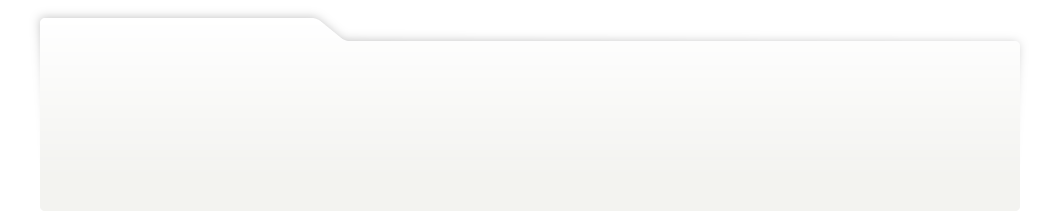
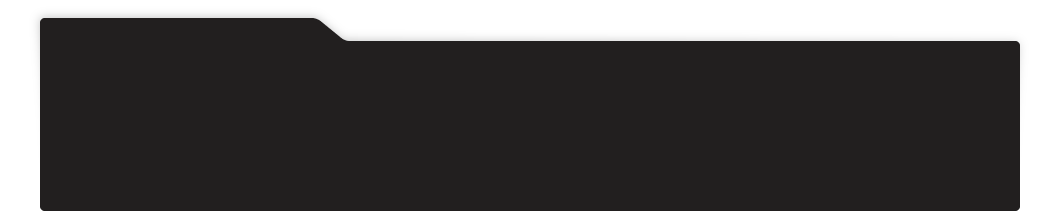
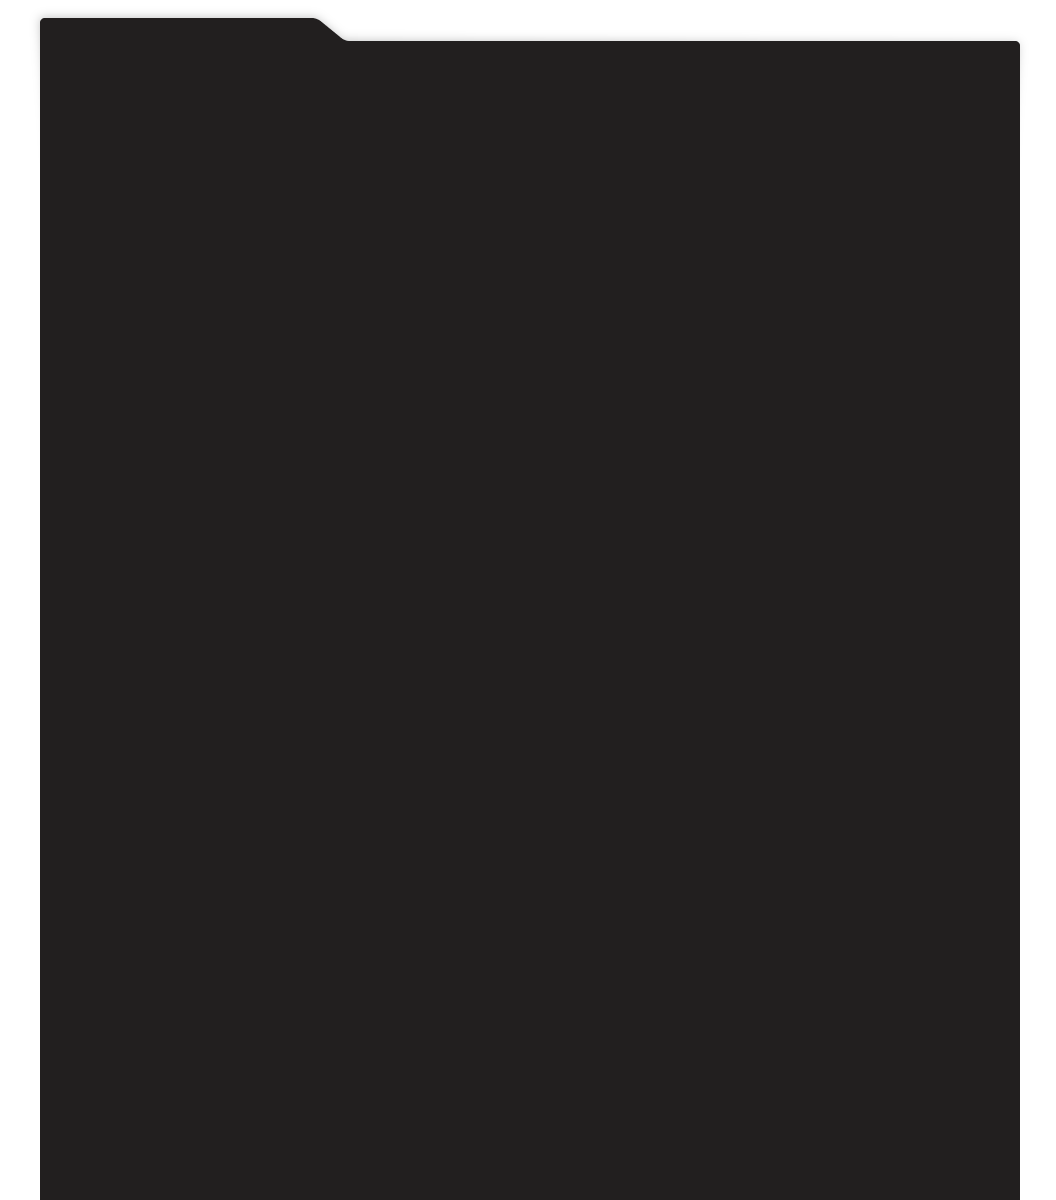
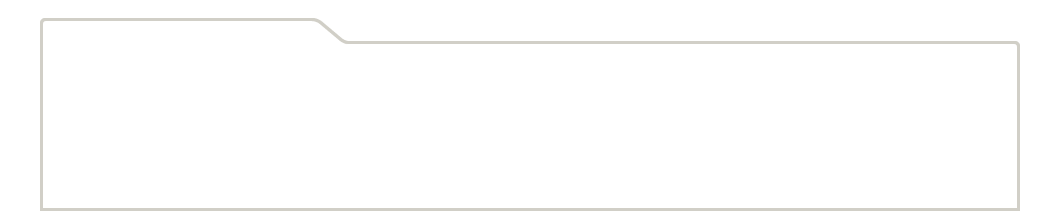
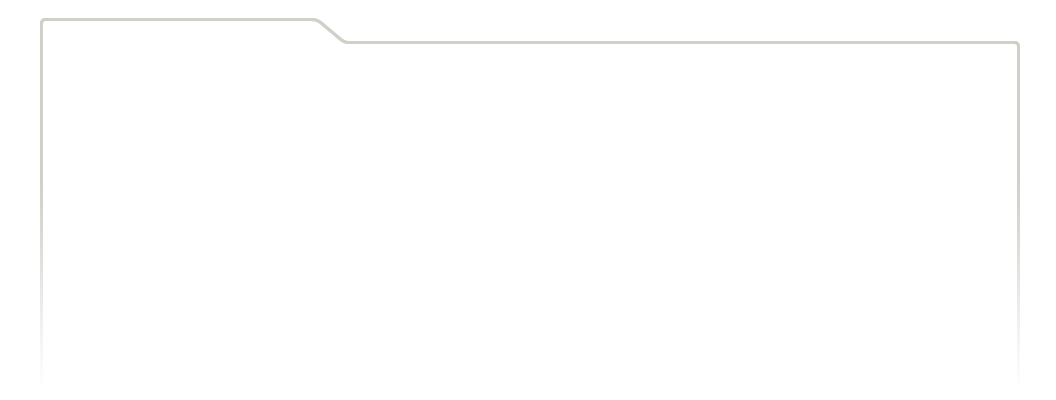
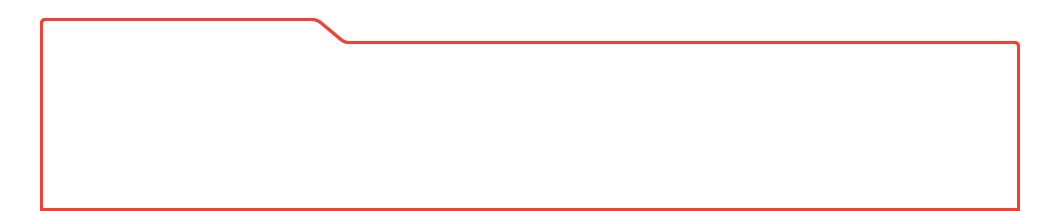
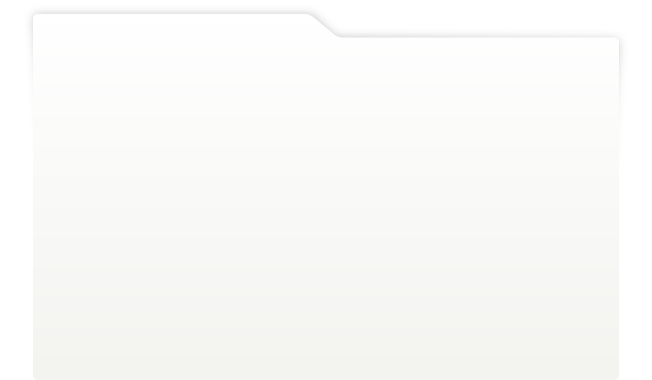
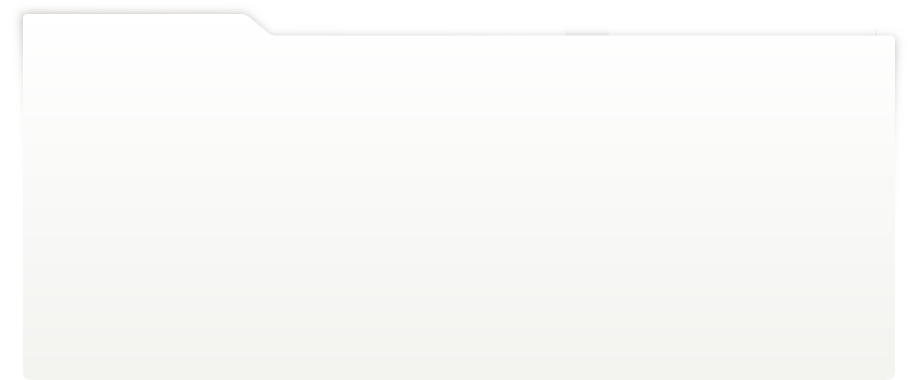
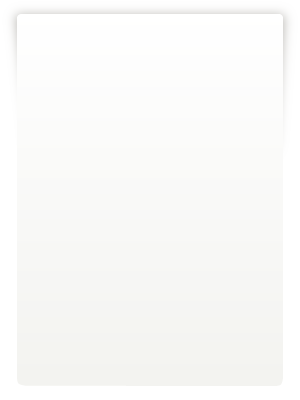
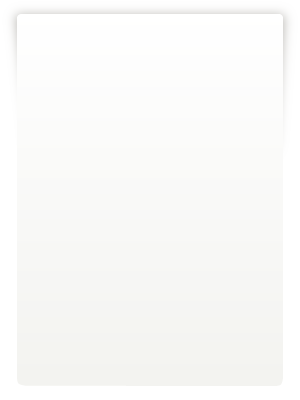
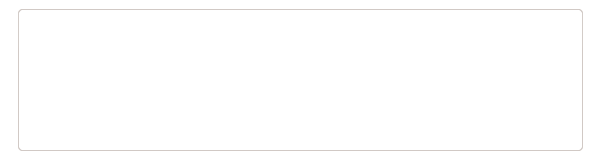
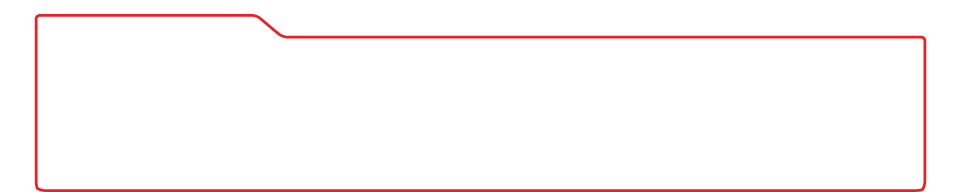
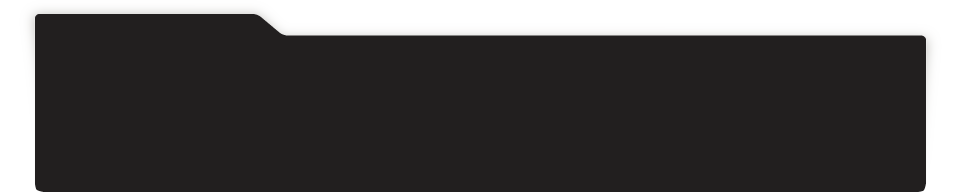
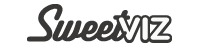
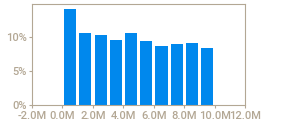
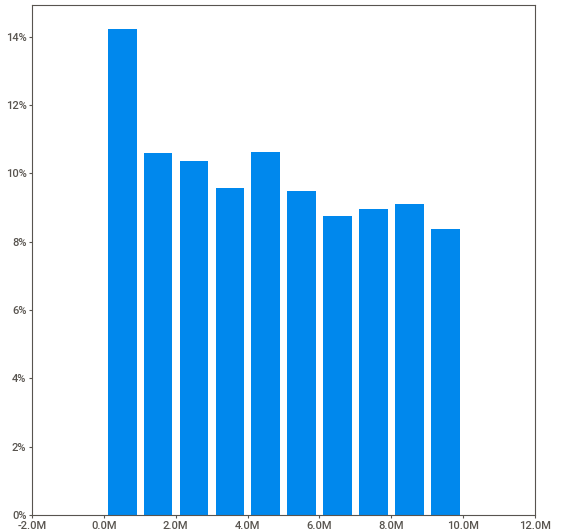
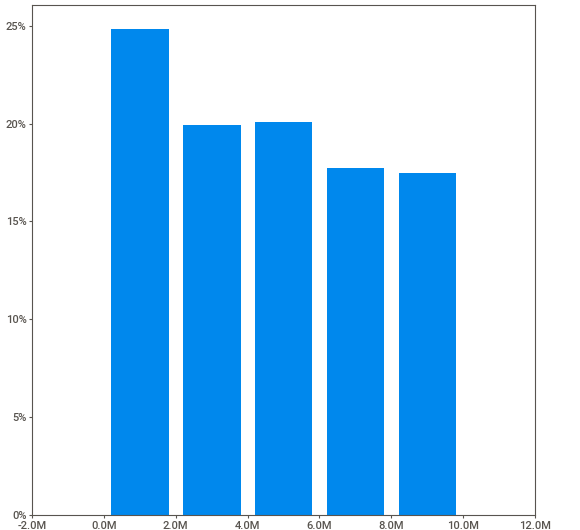
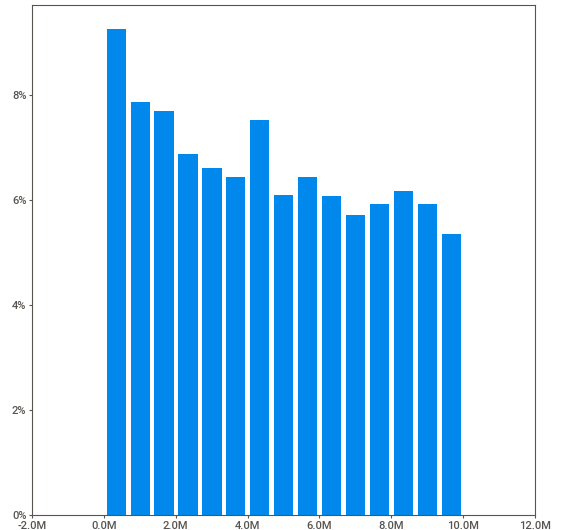
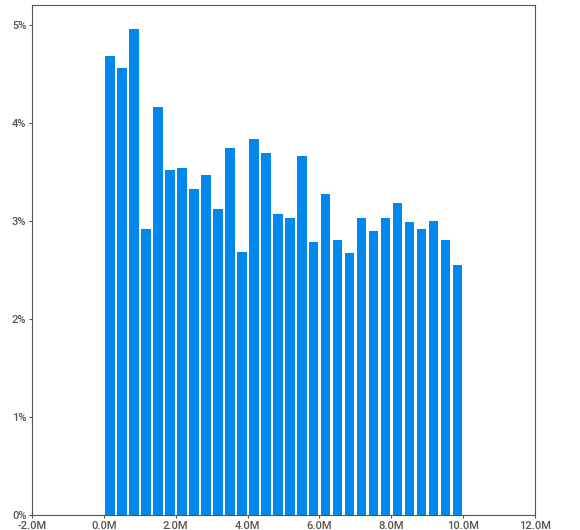
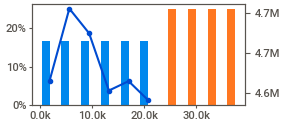
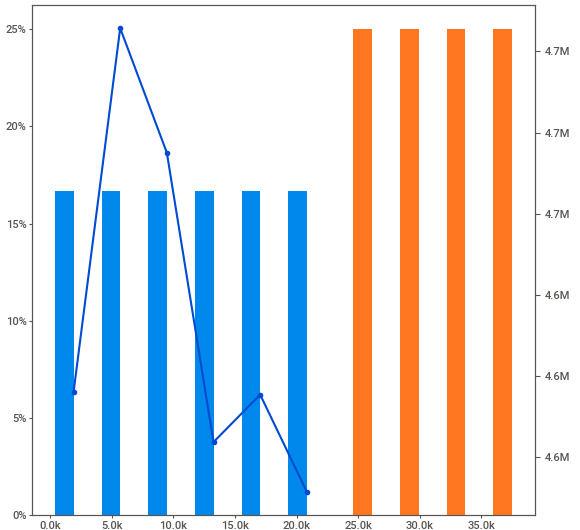
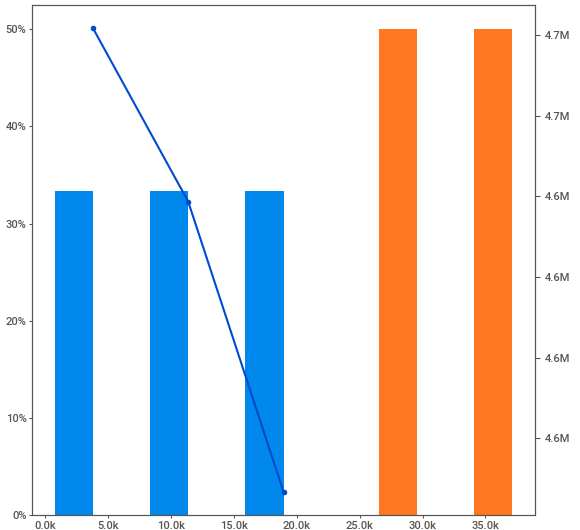
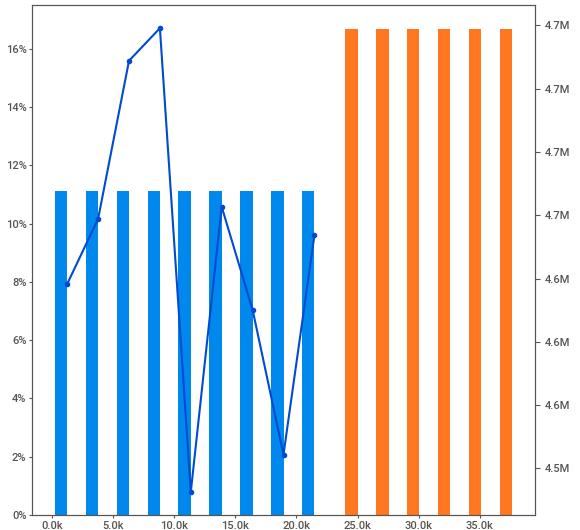
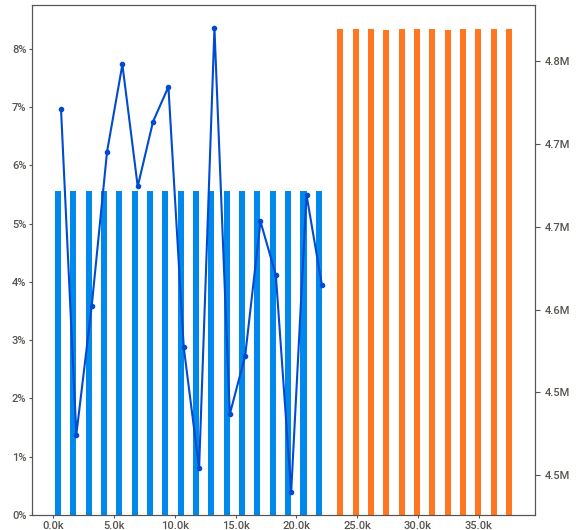
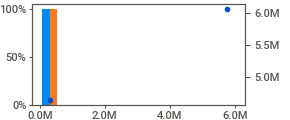
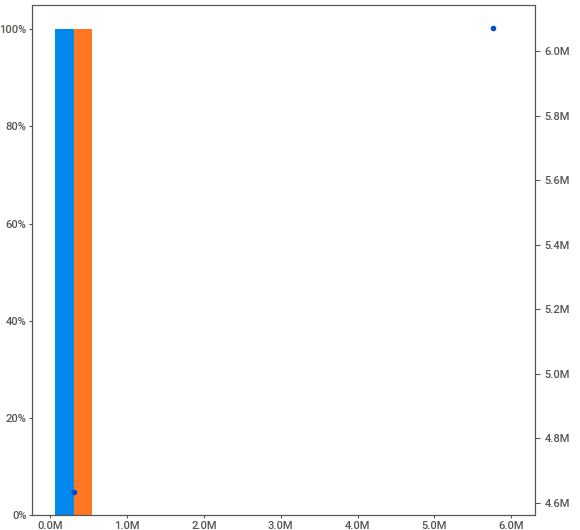
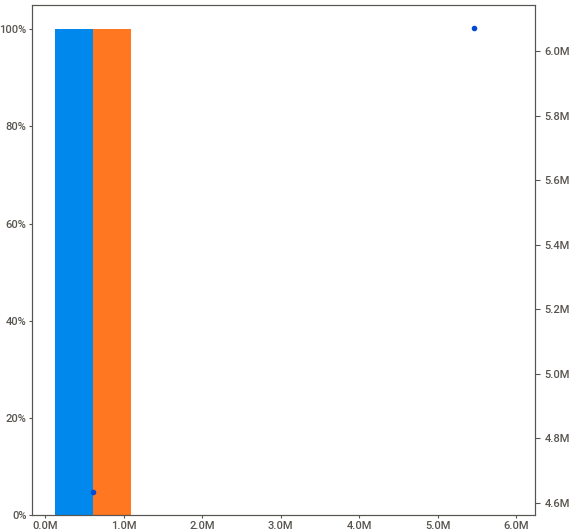
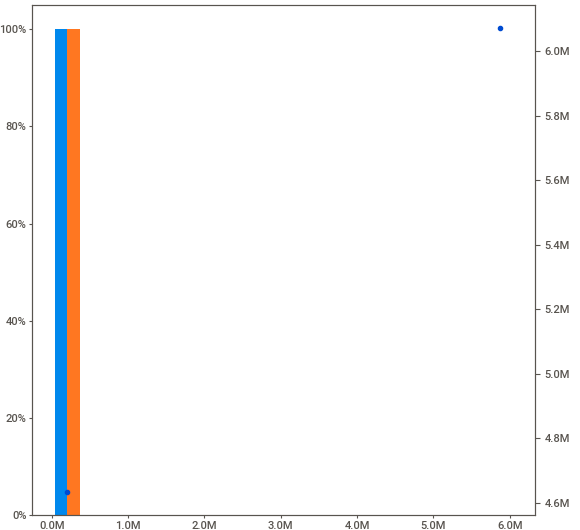
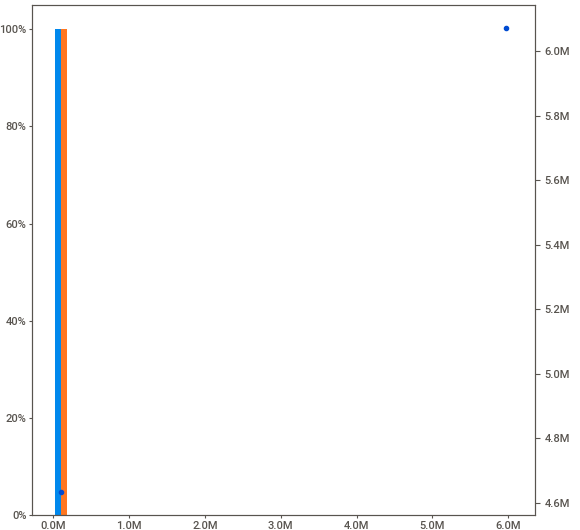
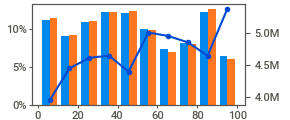
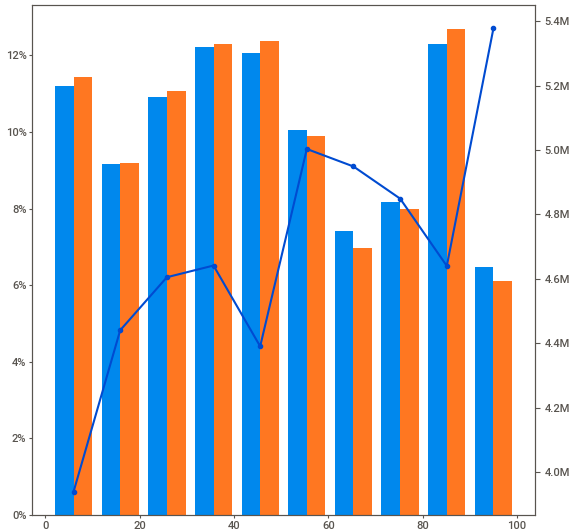
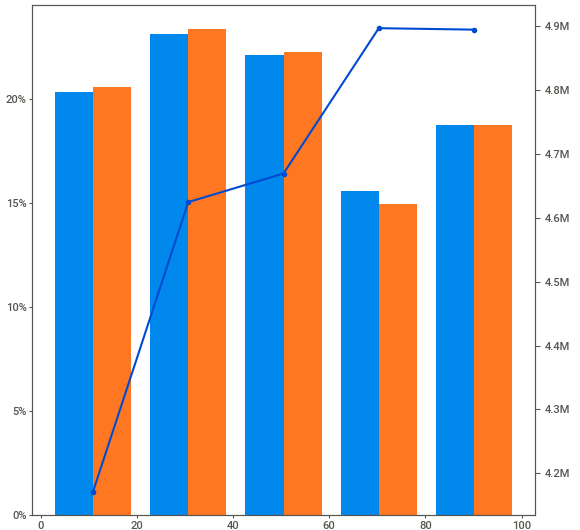
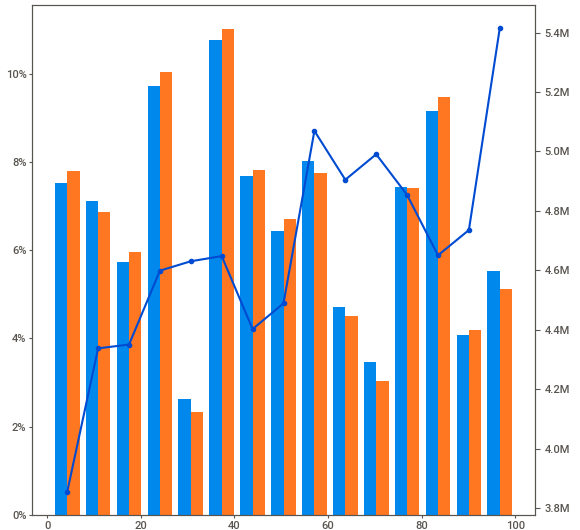
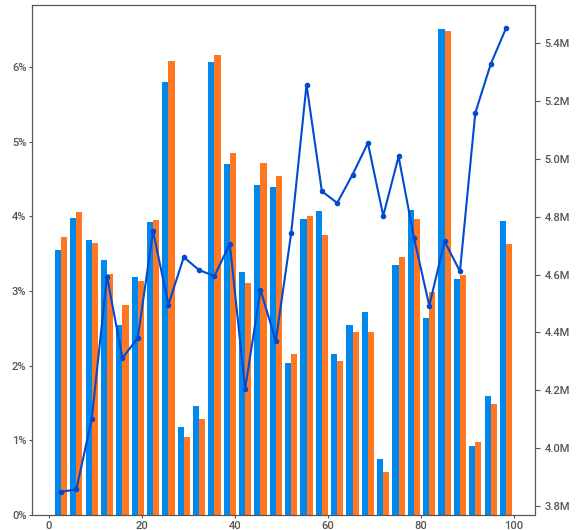
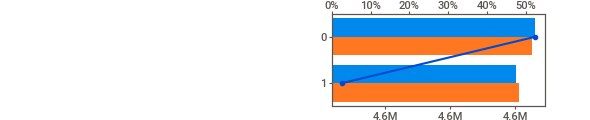
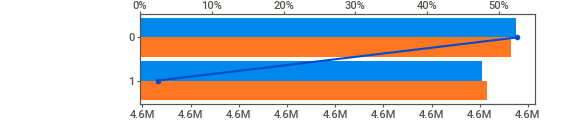
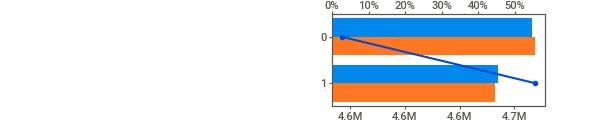
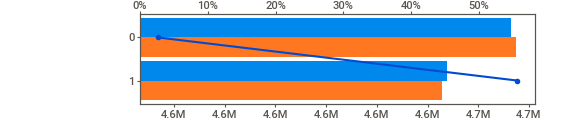
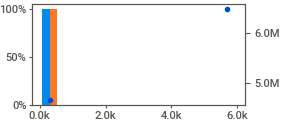
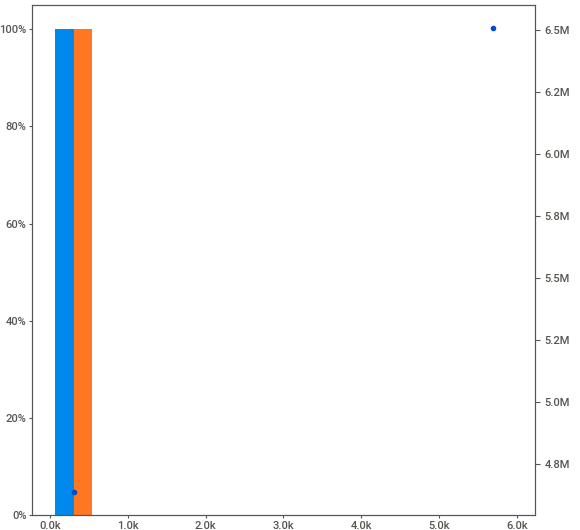
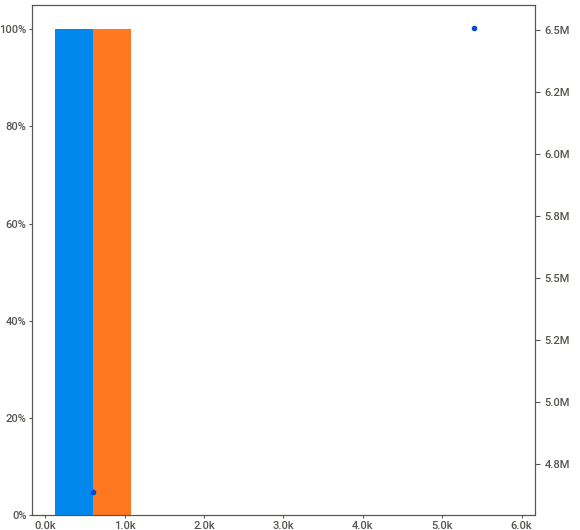
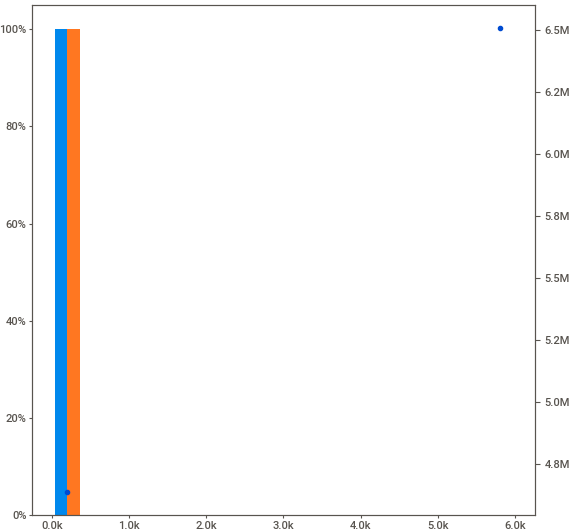
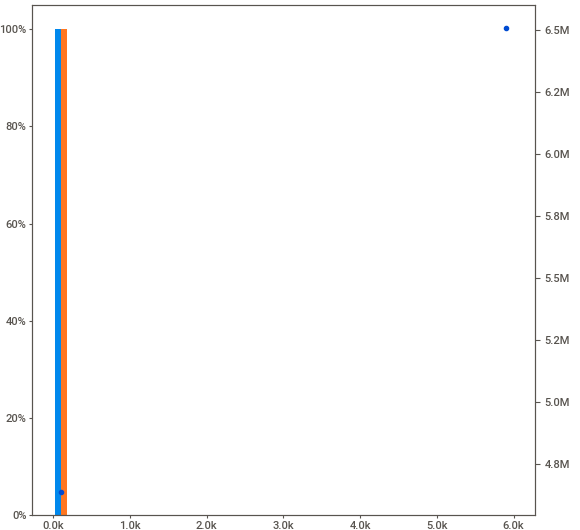
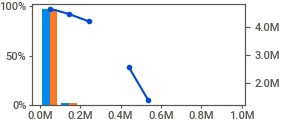
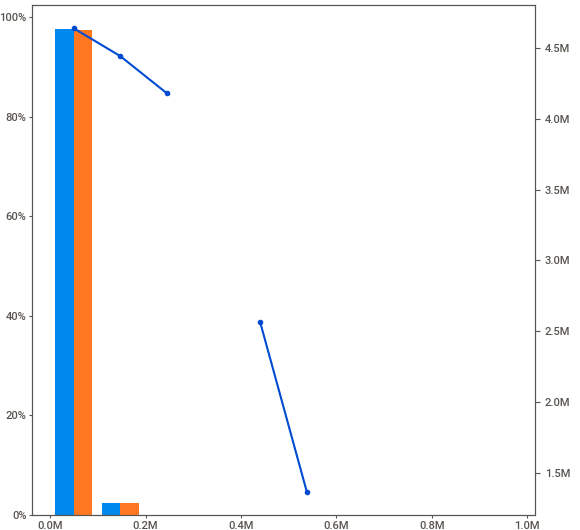
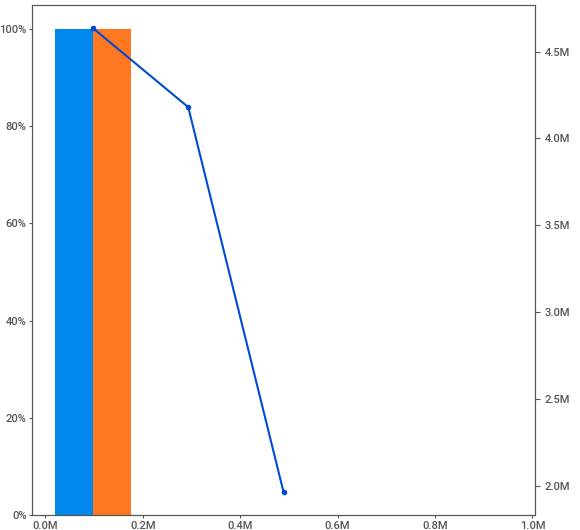
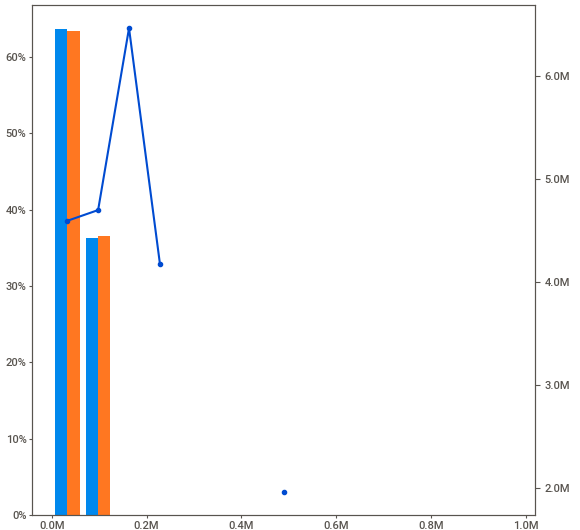
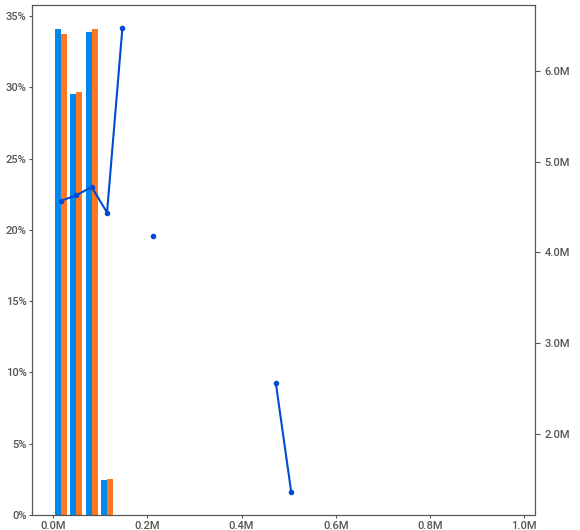
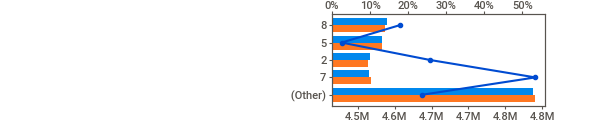
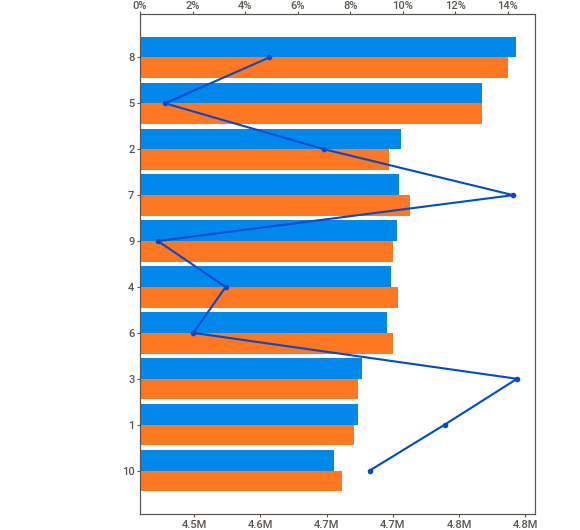
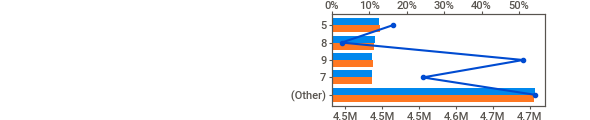
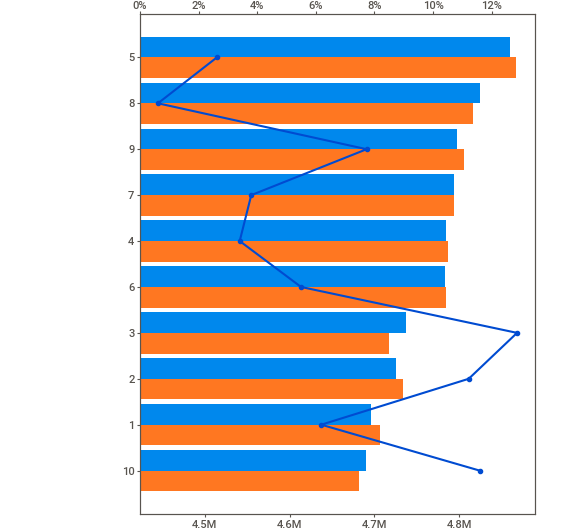
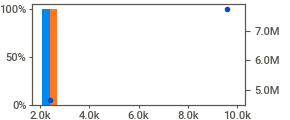
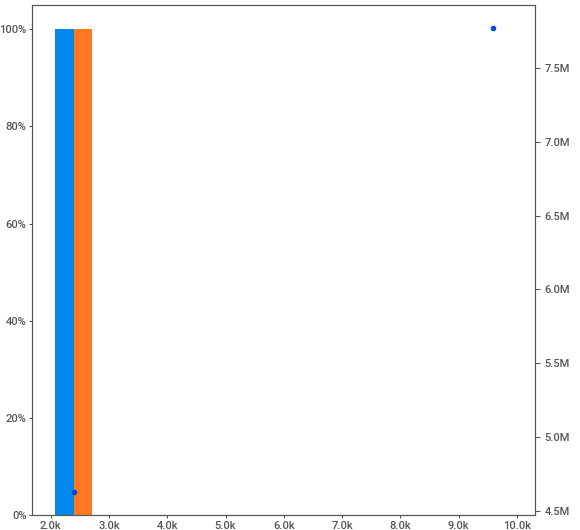
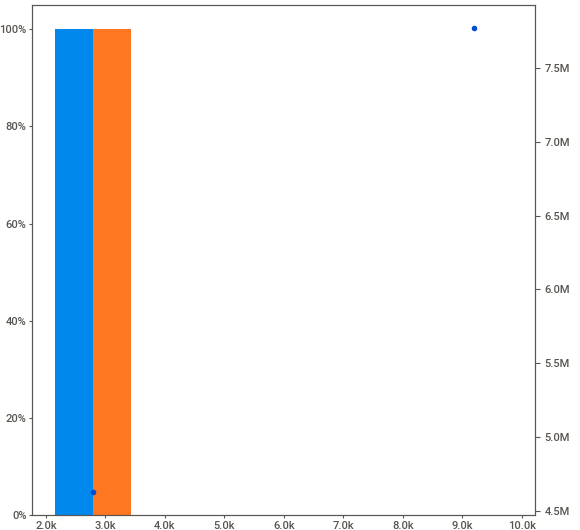
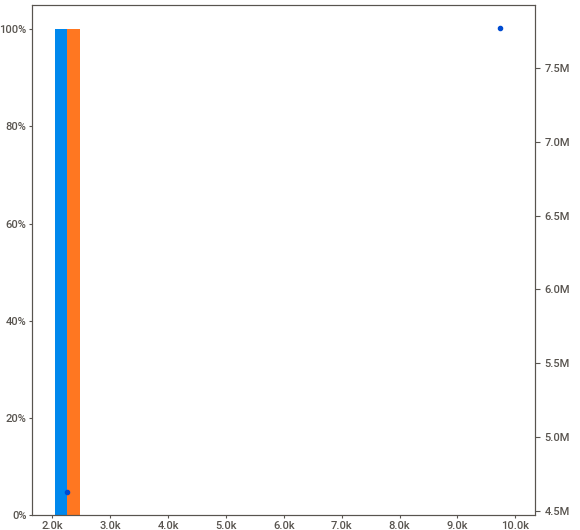
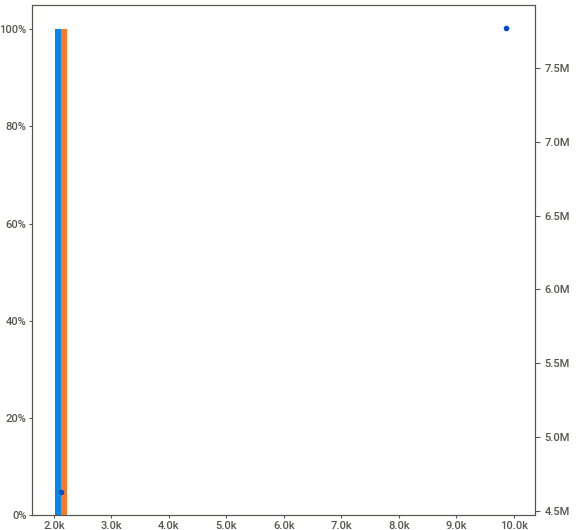
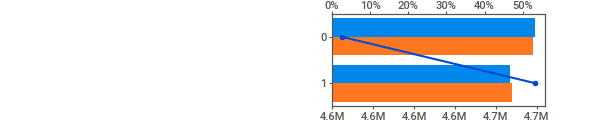
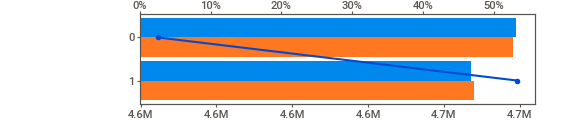
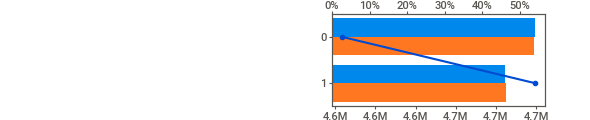
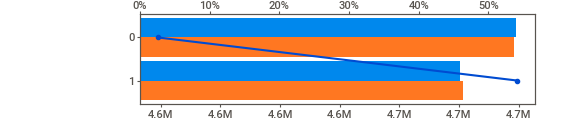
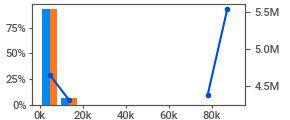
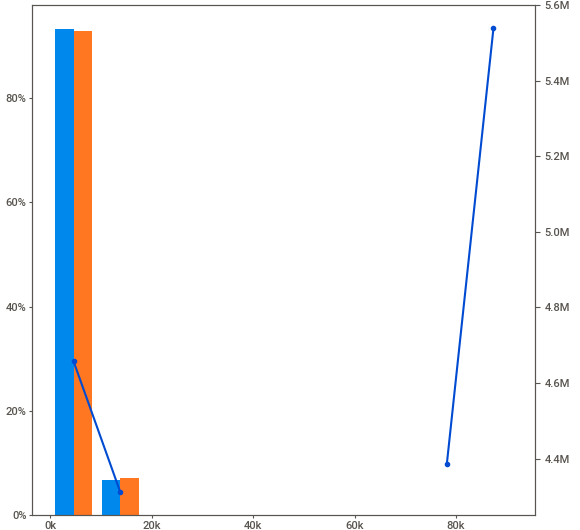
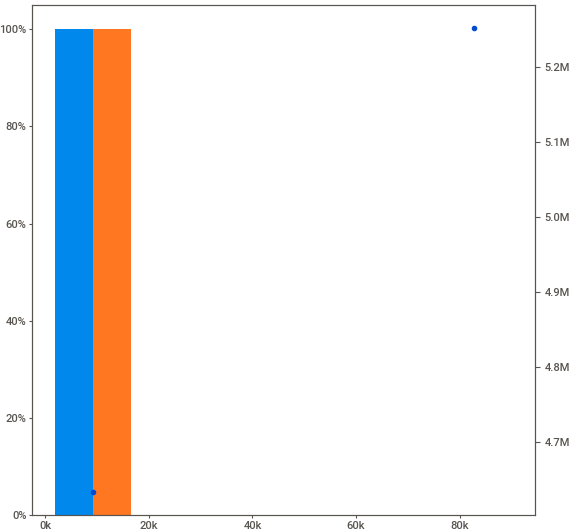
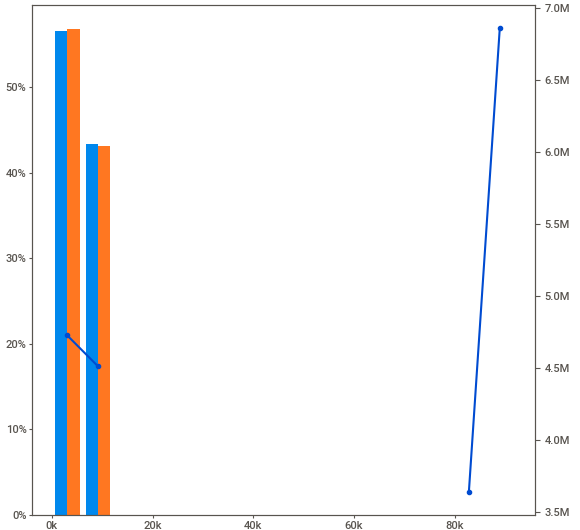
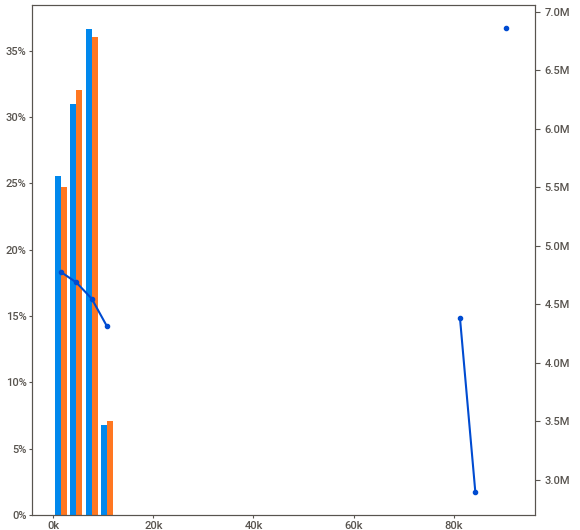
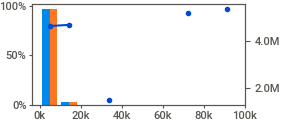
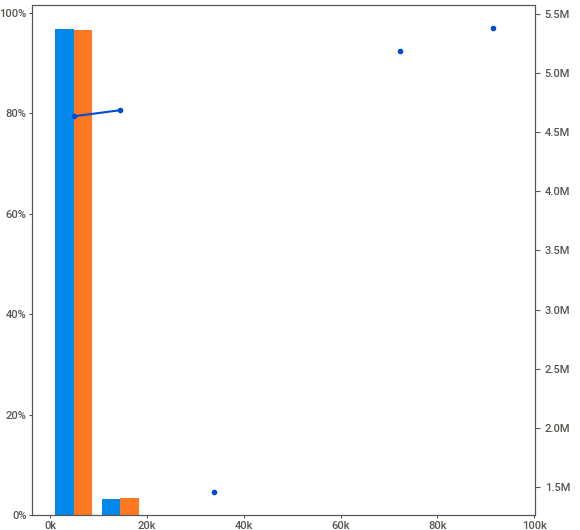
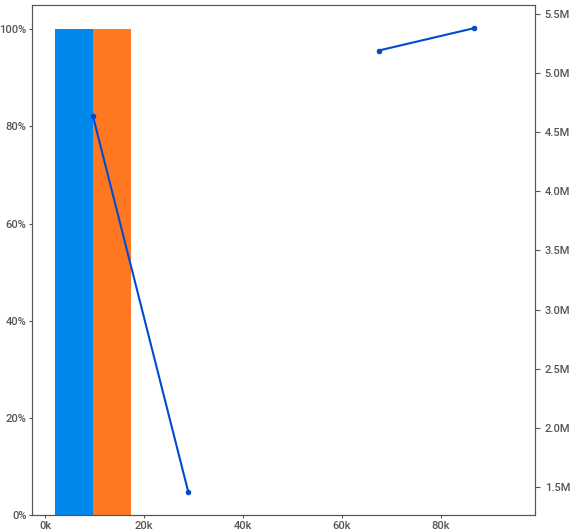
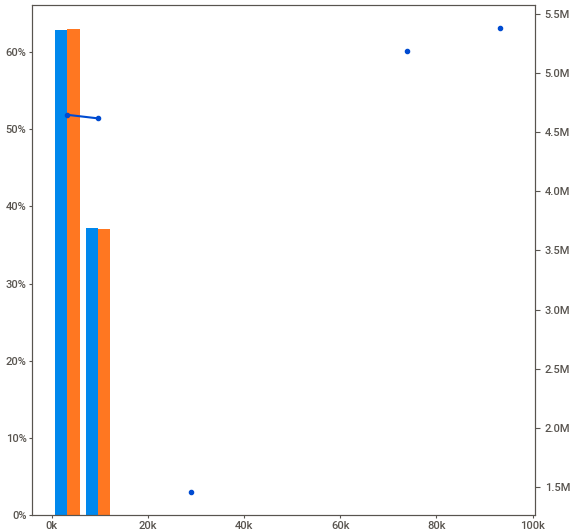
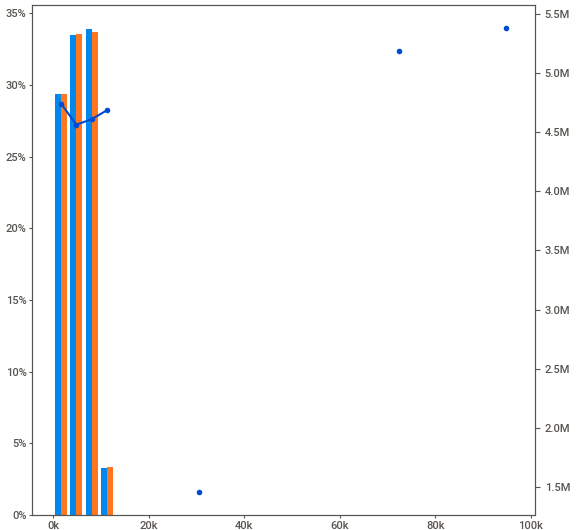
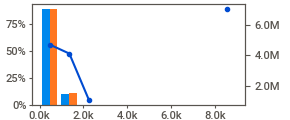
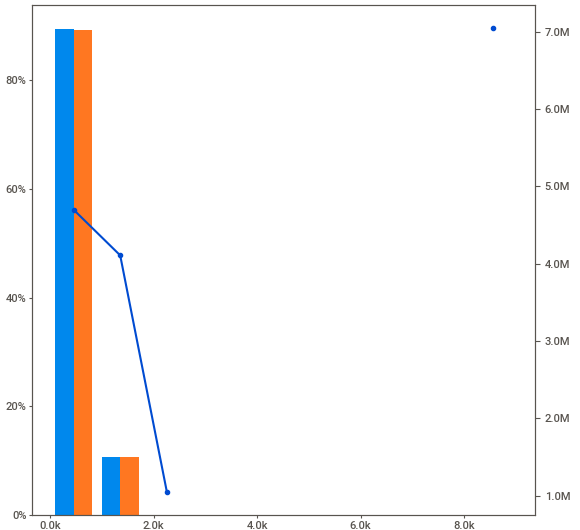
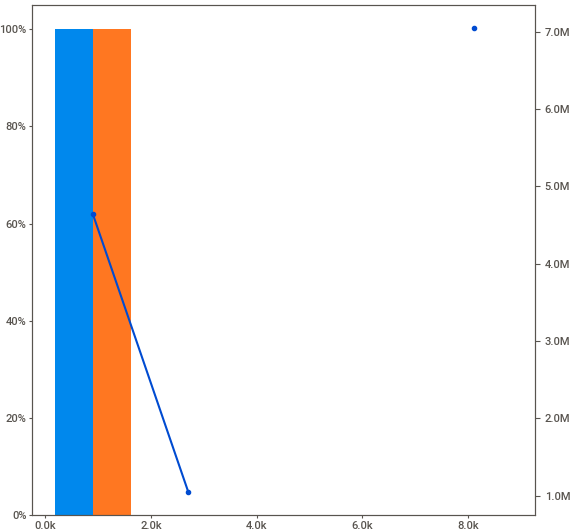
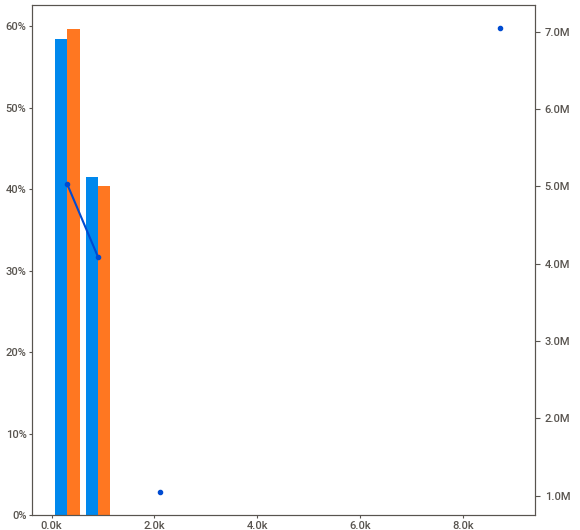
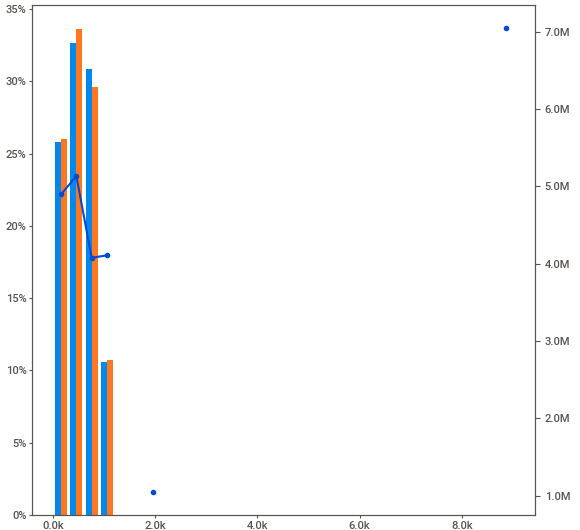
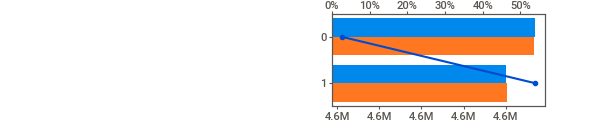
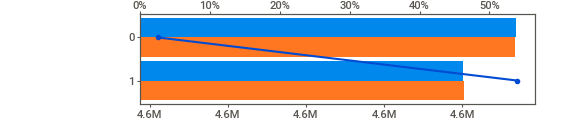
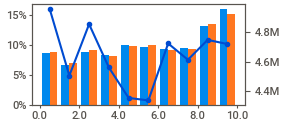
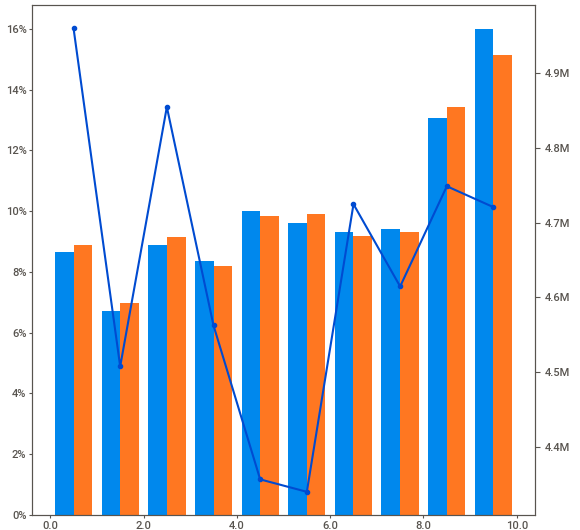
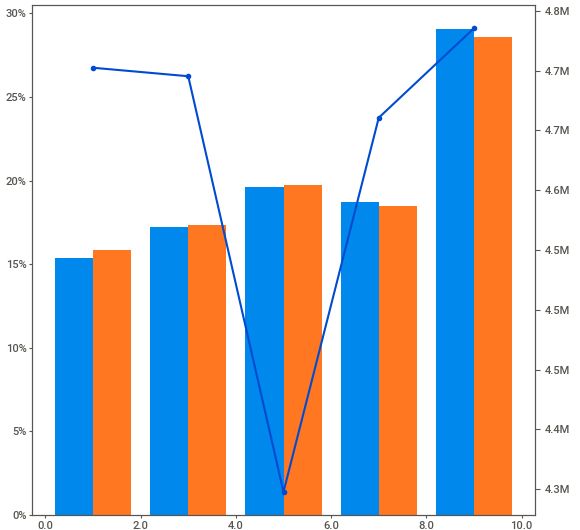
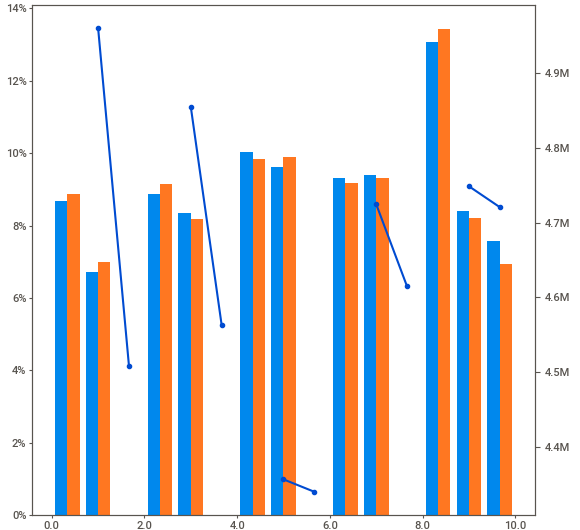
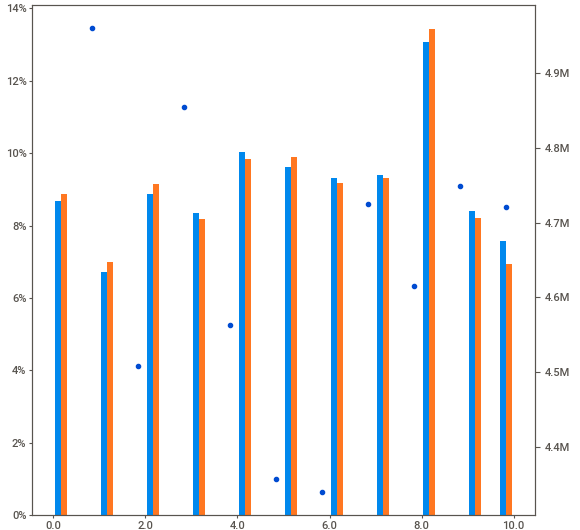
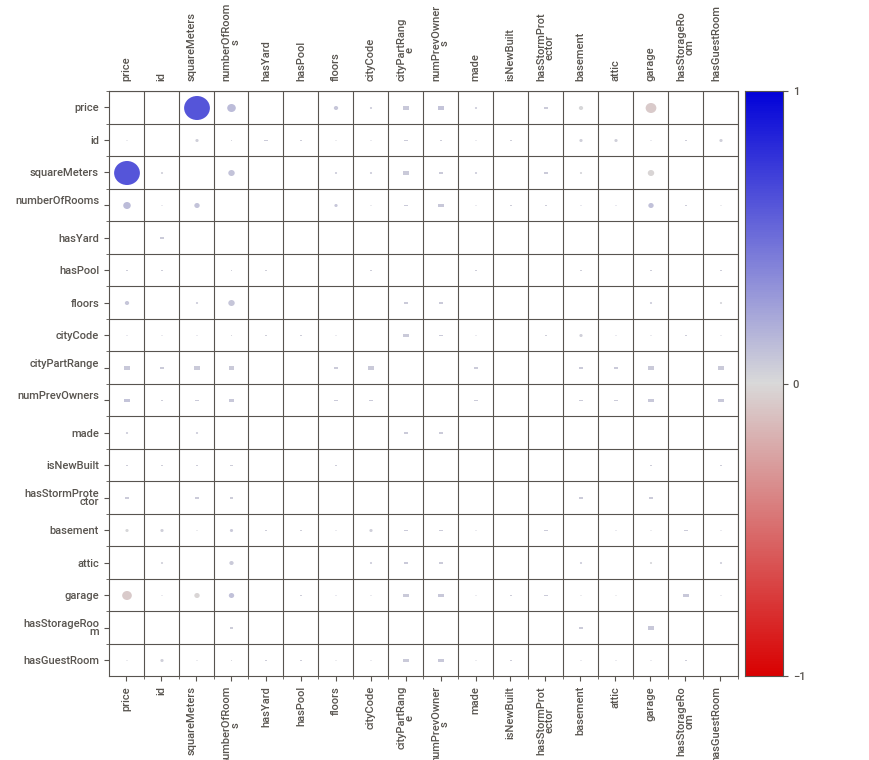
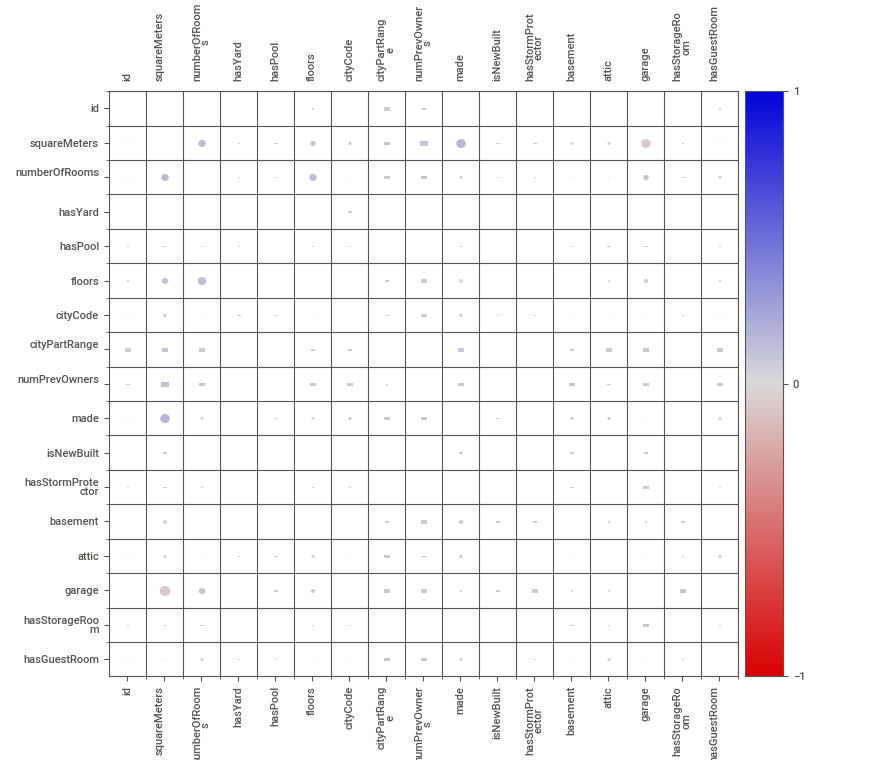

In [ ]:
import sweetviz as sv
comparison_report = sv.compare([train, 'Train'], [test, 'Test'], target_feat = 'price')
comparison_report.show_notebook()

### 범주형 데이터

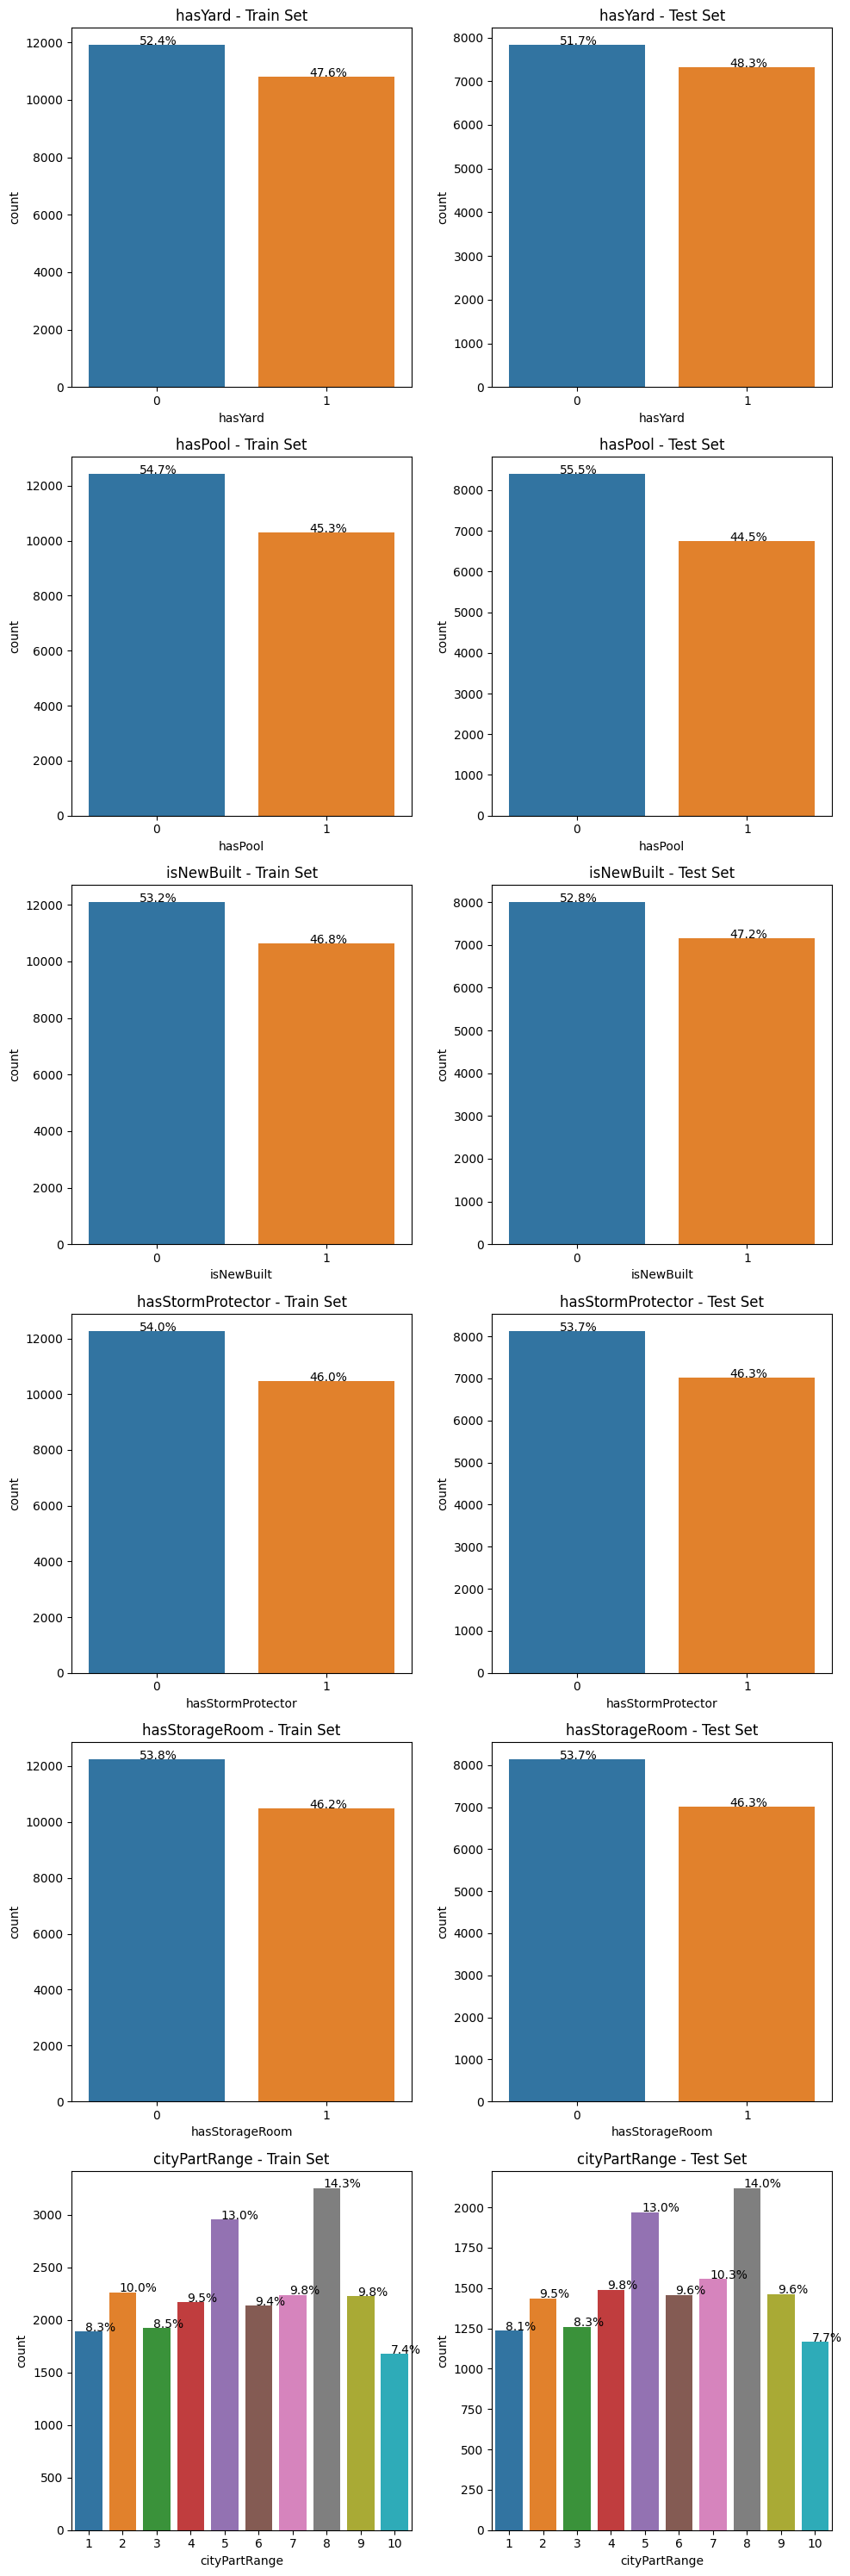

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=len(categorical_data), ncols=2, figsize=(10, 30))

for i, col in enumerate(categorical_data):
    sns.countplot(data=train, x= col, ax=axes[i, 0])
    sns.countplot(data=test, x=col, ax=axes[i, 1])
    axes[i, 0].set_title(col + " - Train Set")
    axes[i, 1].set_title(col + " - Test Set")

    total_train = float(len(train))
    total_test = float(len(test))
    for j, ax in enumerate([axes[i, 0], axes[i, 1]]):
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / (total_train if j == 0 else total_test))
            x = p.get_x() + p.get_width() / 2 - 0.1
            y = p.get_y() + p.get_height() + 3
            ax.annotate(percentage, (x, y))
plt.tight_layout()
plt.show()

### 수치형 데이터

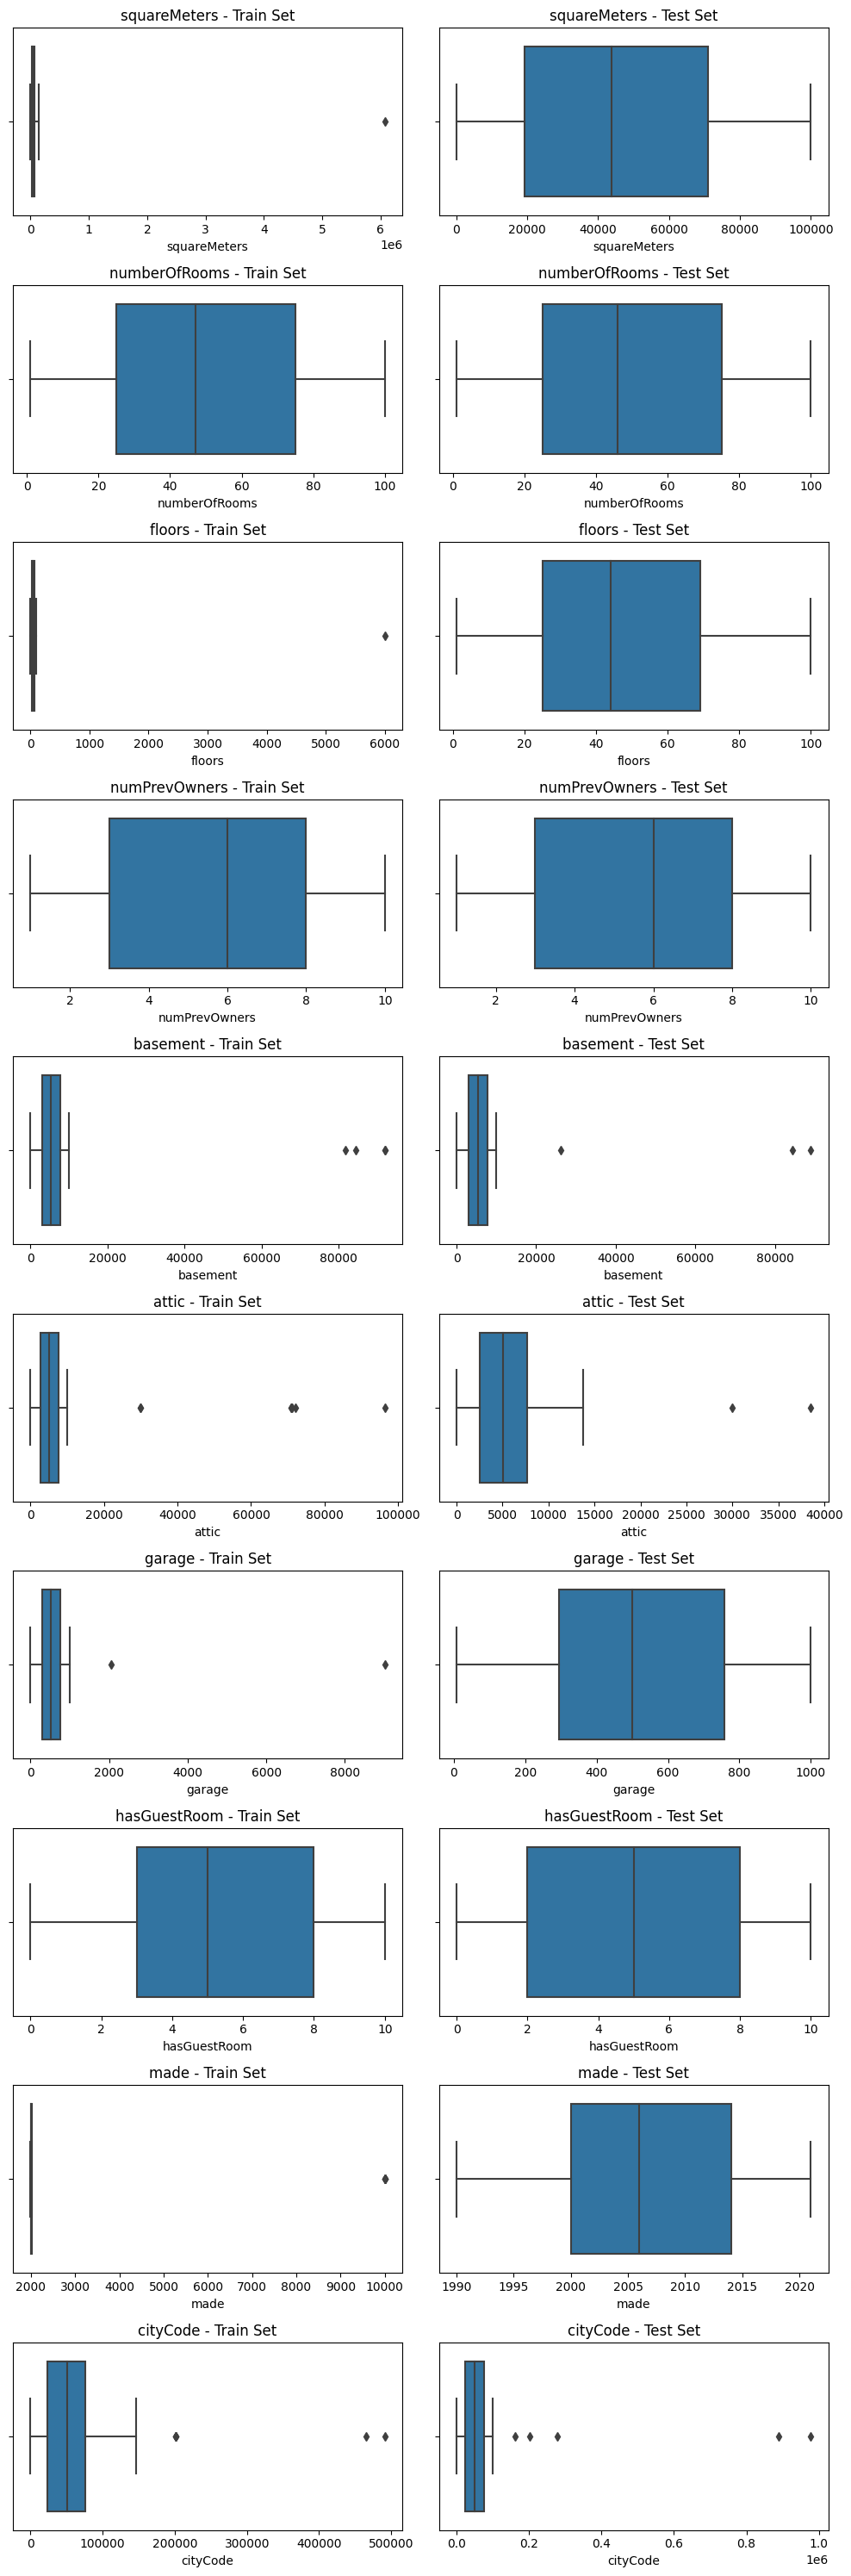

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Boxplots
fig, axes = plt.subplots(nrows=len(numerical_data), ncols=2, figsize=(10, 30))

for i, col in enumerate(numerical_data):
    sns.boxplot(data=train, x=col, ax=axes[i, 0])
    sns.boxplot(data=test, x=col, ax=axes[i, 1])
    axes[i, 0].set_title(col + " - Train Set")
    axes[i, 1].set_title(col + " - Test Set")
plt.tight_layout()
plt.show()

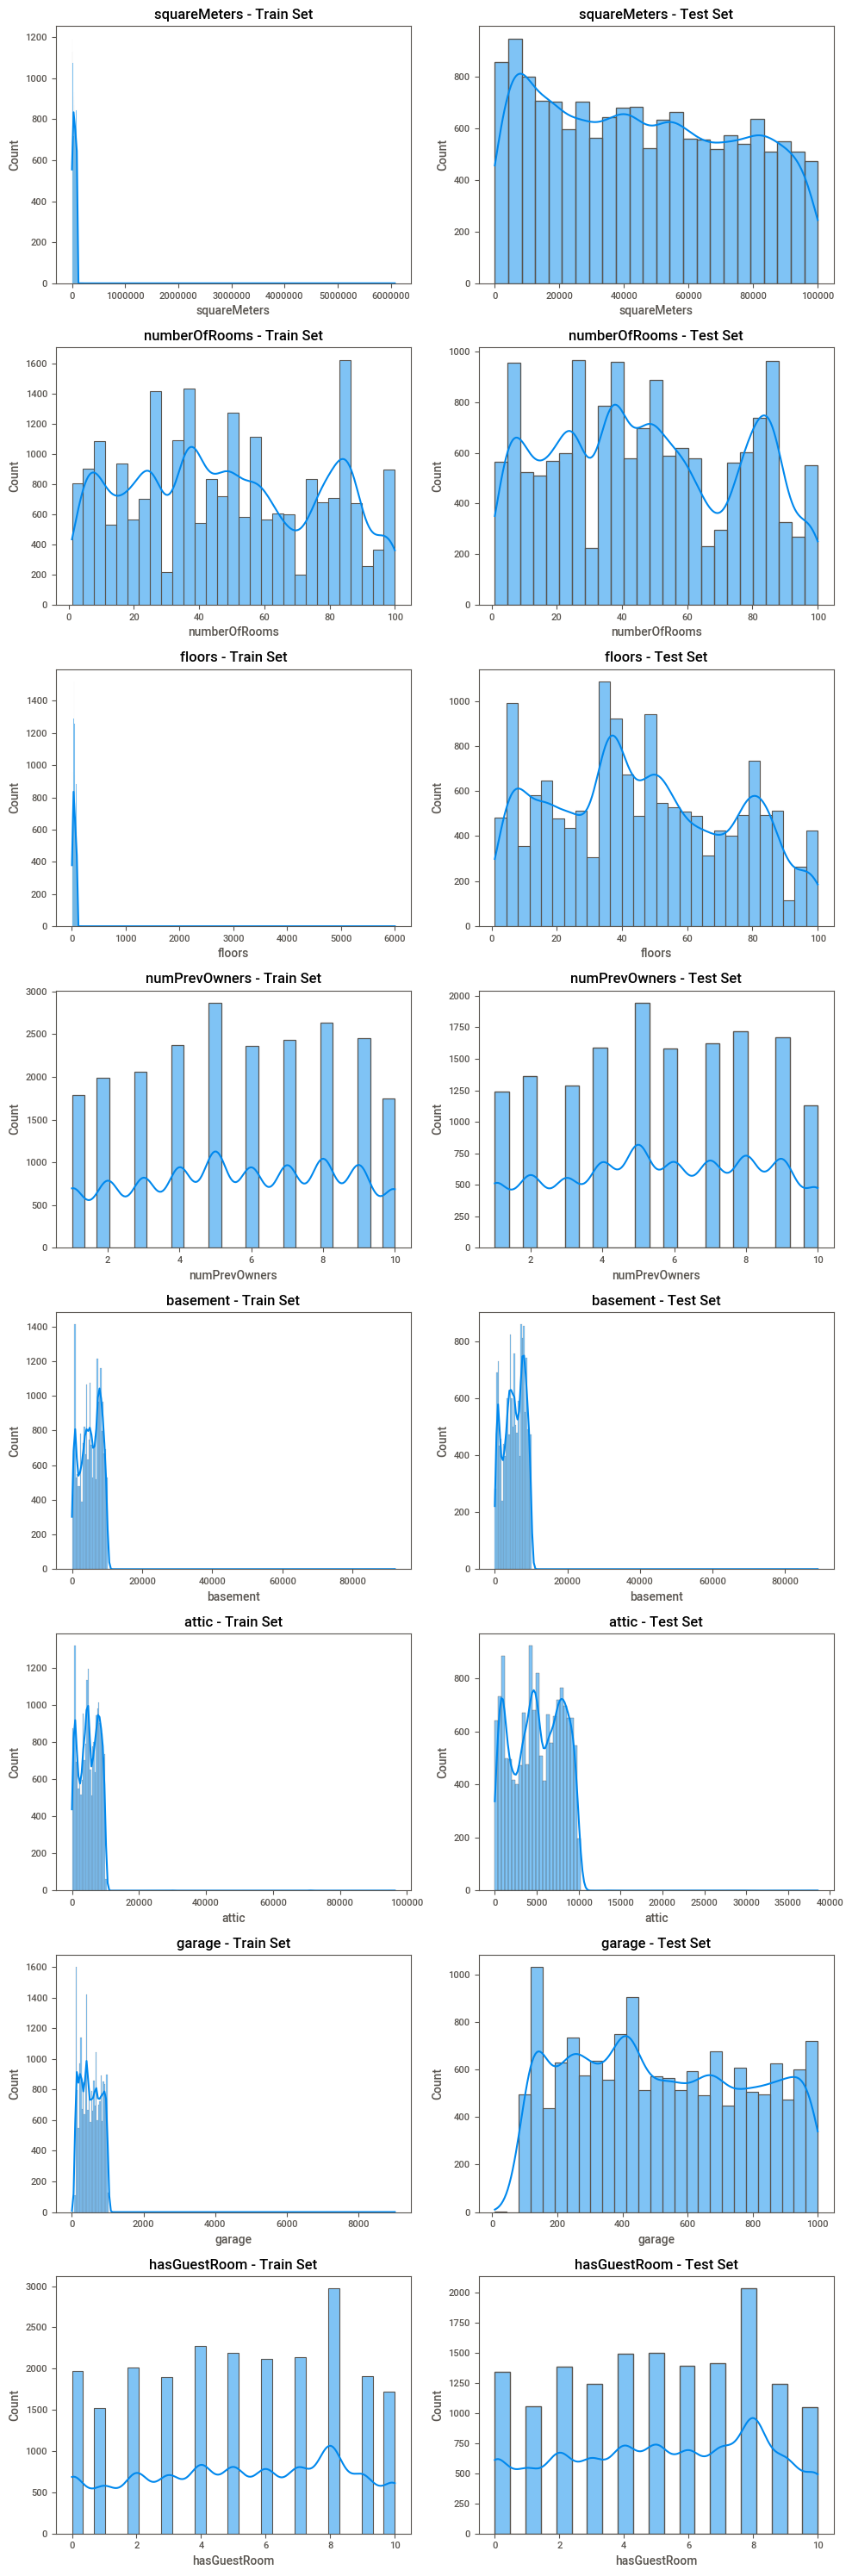

In [ ]:
# Plotting histograms
fig, axes = plt.subplots(nrows=len(numerical_data), ncols=2, figsize=(10, 30))

for i, col in enumerate(numerical_data):
    sns.histplot(data=train, x=col, kde=True, ax=axes[i, 0])
    sns.histplot(data=test, x=col, kde=True, ax=axes[i, 1])
    axes[i, 0].set_title(col + " - Train Set")
    axes[i, 1].set_title(col + " - Test Set")
plt.tight_layout()
plt.show()

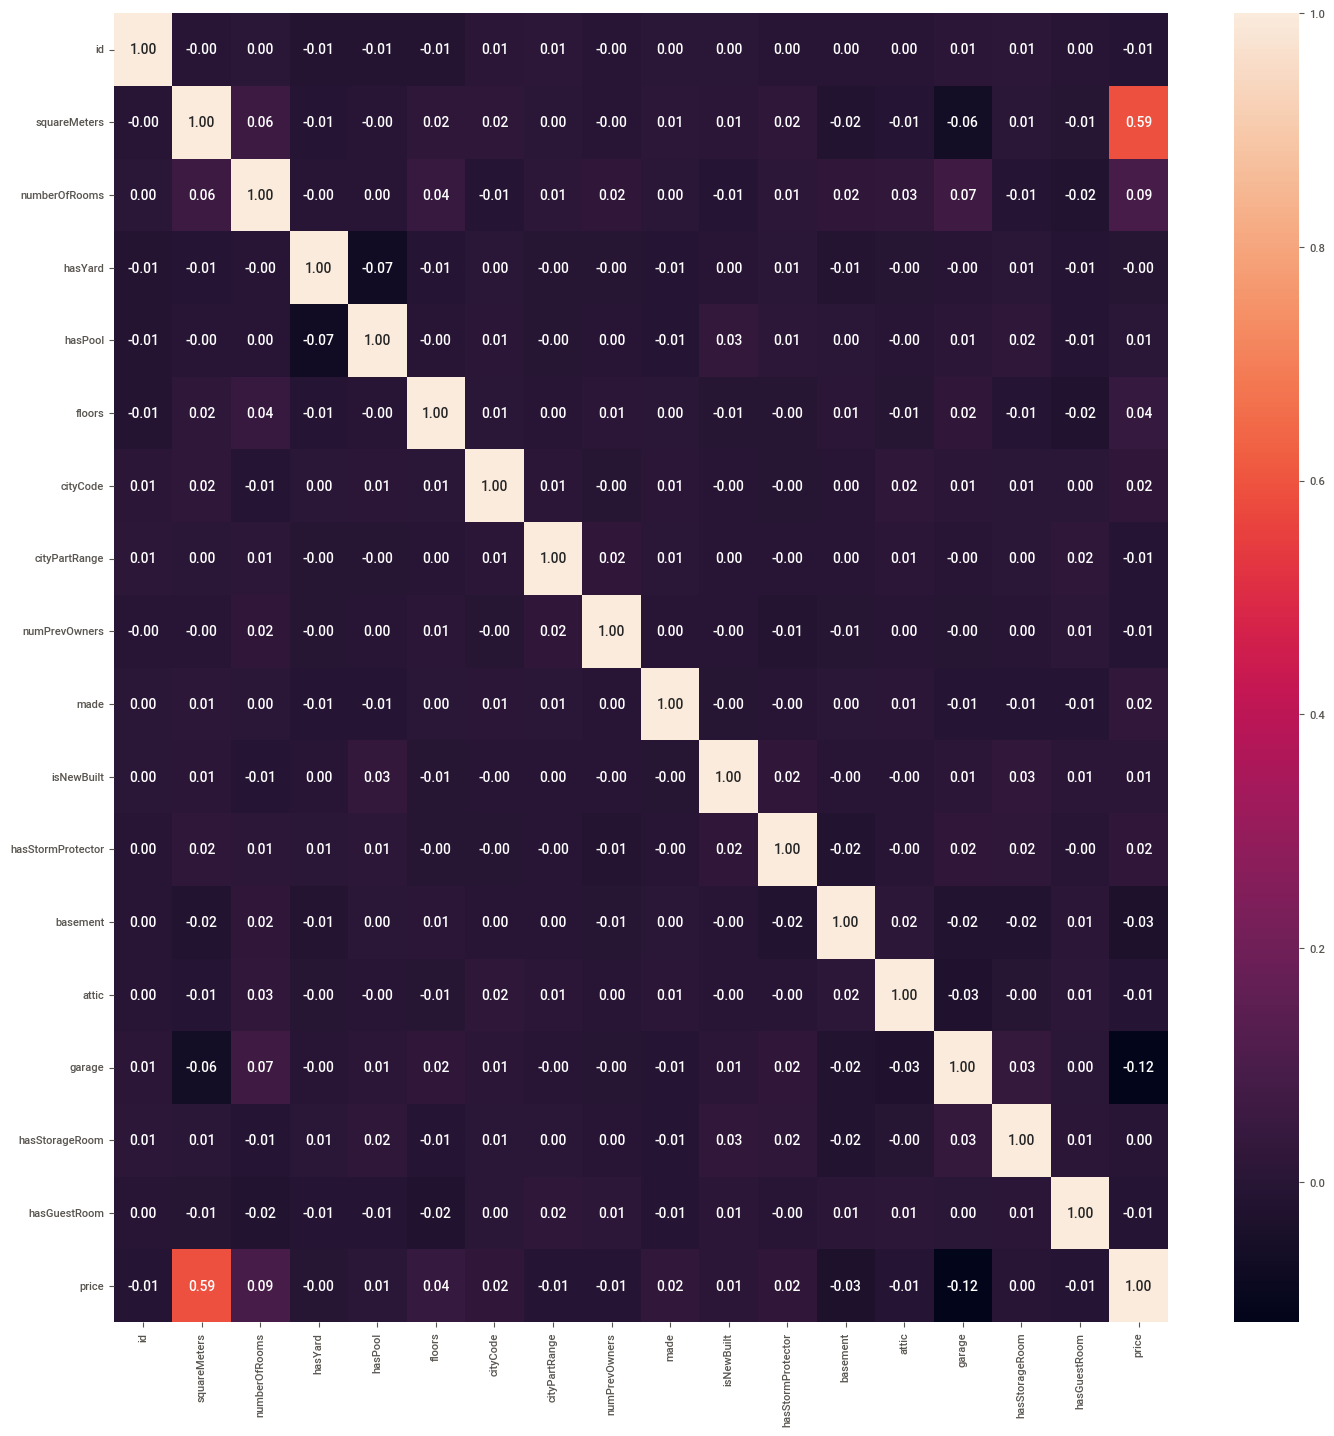

In [ ]:
# 상관관계가 확인, 히트맵
import numpy as np
corr = np.corrcoef(train.values.T) # 피어슨 상관계수 값을 계산
plt.figure( figsize = (17, 17) )
sns.heatmap( corr, cbar= True, annot= True, fmt= '.2f', yticklabels= train.columns, xticklabels= train.columns)
plt.show()

## 이상치 제거

In [ ]:
# 테스트 데이터 최댓값
maximum_values = test[numerical_data].max()

# 테스트 데이터의 최대값과 같거나 작은 값만 저장
masks = []
for feature in numerical_data:
    mask = train[feature] <= maximum_values[feature]
    masks.append(mask)

# 테스트 데이터의 최대값을 초과하는 값 제거
combined_mask = pd.concat(masks, axis = 1).all(axis=1)

train_re = train[combined_mask].reset_index(drop=True)

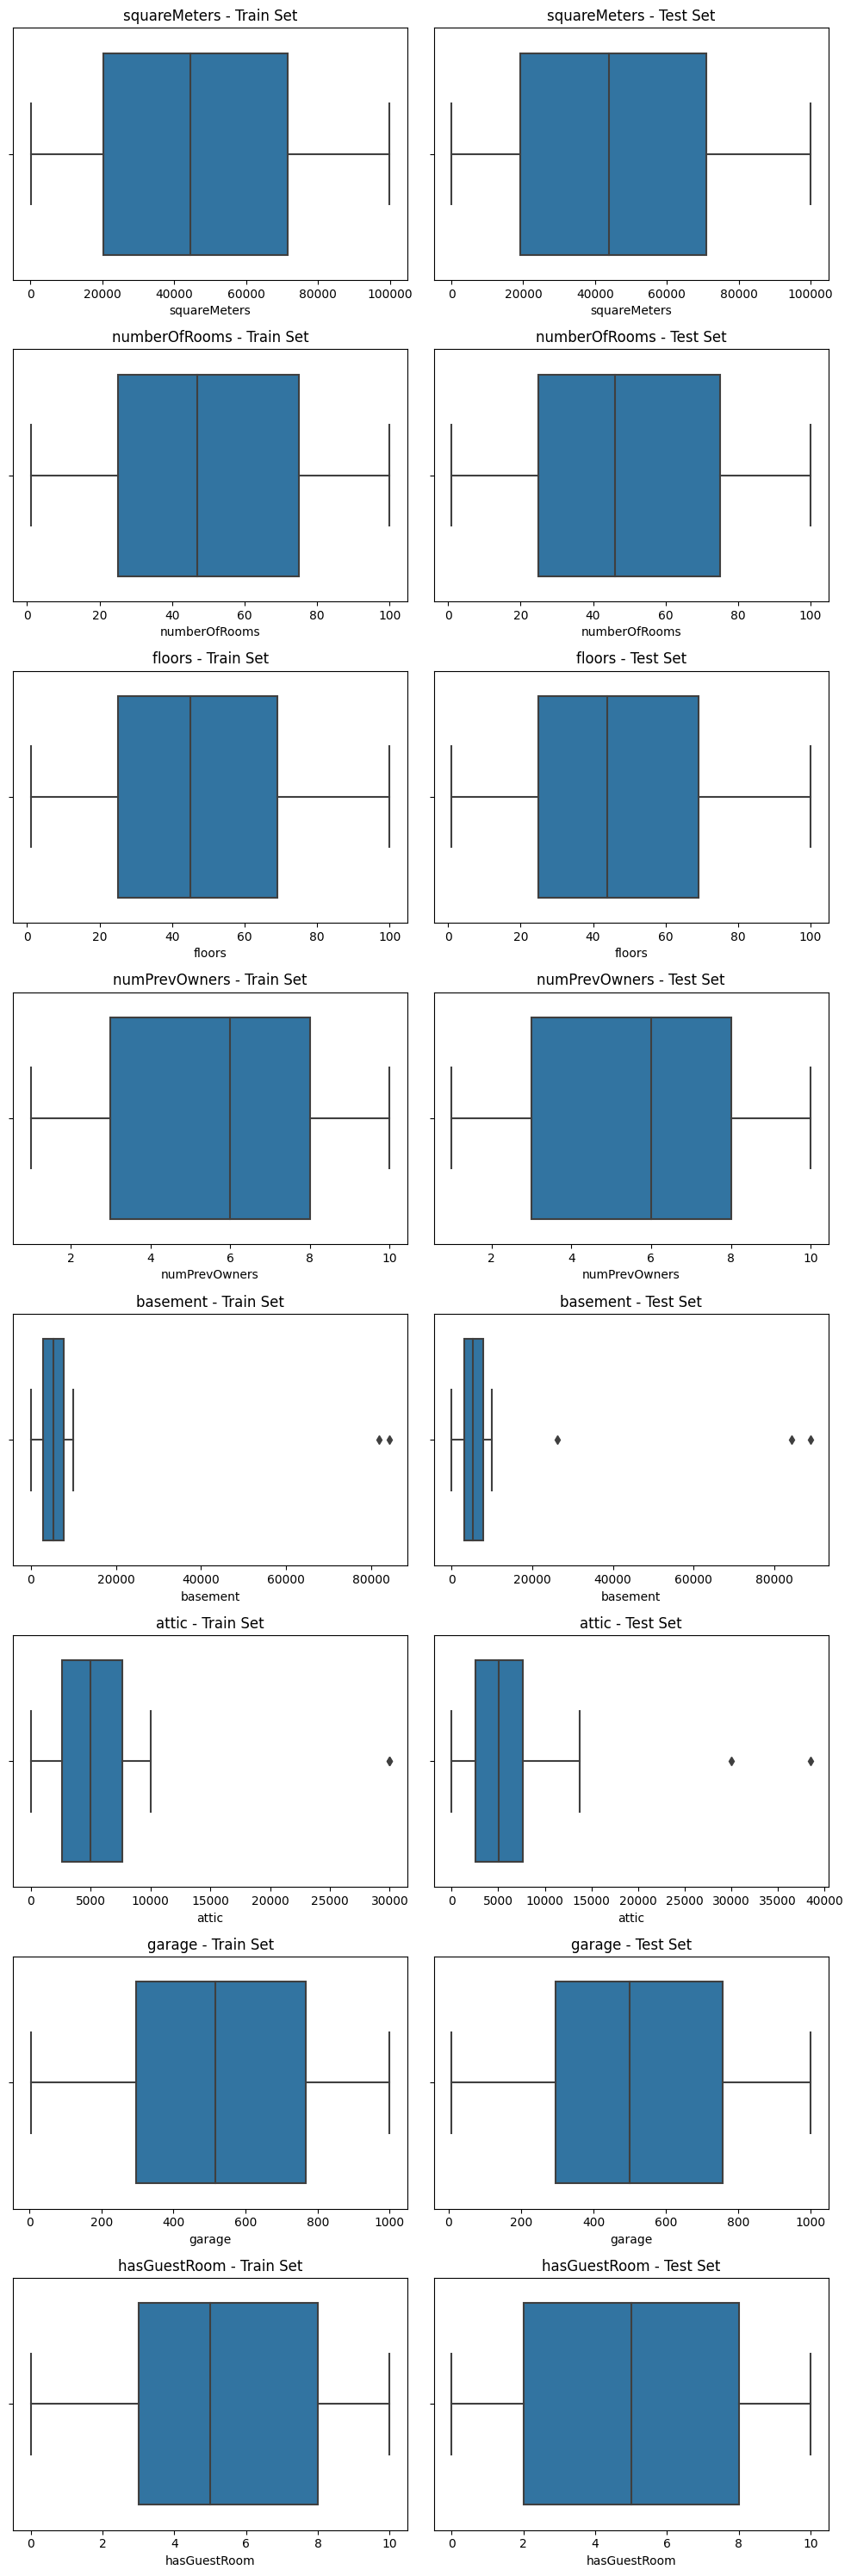

In [ ]:
# Plotting boxplots
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=len(numerical_data), ncols=2, figsize=(10, 30))

for i, col in enumerate(numerical_data):
    sns.boxplot(data=train_re, x=col, ax=axes[i, 0])
    sns.boxplot(data=test, x=col, ax=axes[i, 1])
    axes[i, 0].set_title(col + " - Train Set")
    axes[i, 1].set_title(col + " - Test Set")
plt.tight_layout()
plt.show()

### basement, attic 추가 확인 필요

In [ ]:
maximum_values_train = train_re[numerical_data].max()
maximum_values_train

squareMeters     99985
numberOfRooms      100
floors             100
numPrevOwners       10
basement         84333
attic            30000
garage            1000
hasGuestRoom        10
dtype: int64

<Axes: xlabel='basement', ylabel='price'>

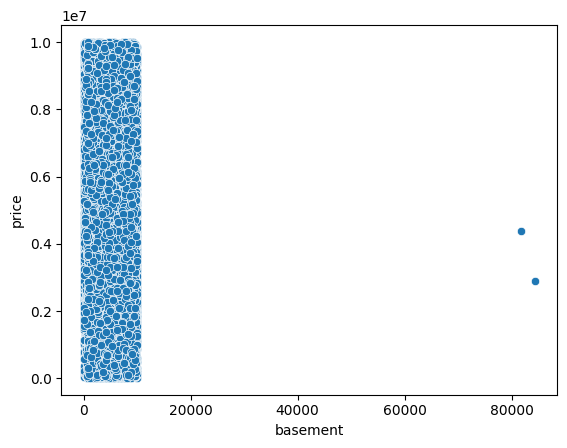

In [ ]:
sns.scatterplot(data=train_re, x='basement', y='price')

In [ ]:
train_re = train_re[train_re['basement'] < 60000]

<Axes: xlabel='attic', ylabel='price'>

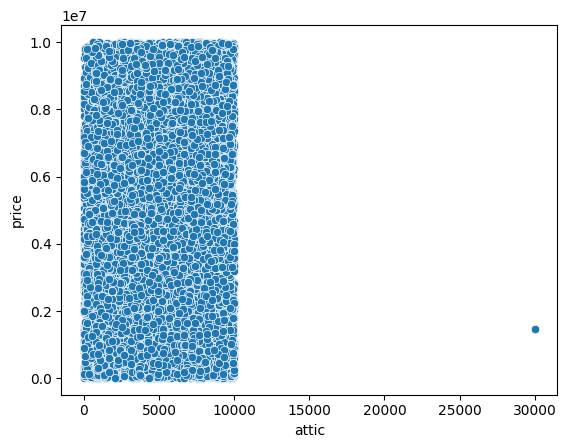

In [ ]:
sns.scatterplot(data=train_re, x='attic', y='price')

In [ ]:
train_re = train_re[train_re['attic'] < 20000]
train_re.head(3)

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         8   5196     369               0             3  3436795.2  
1       729   4496     277               0             6  9519958.0  
2      7473   8953     245               1             9  9276448.1

### z-score

- Z-score는 해당 데이터가 평균으로부터 얼마의 표준 편차만큼 벗어나 있는지를 의미
- 1 표준 편차, 2 표준 편차, 3 표준 편차를 사용했을 때 파란색 범위를 벗어나는 데이터는 이상치로 간주될 수 있음을 의미

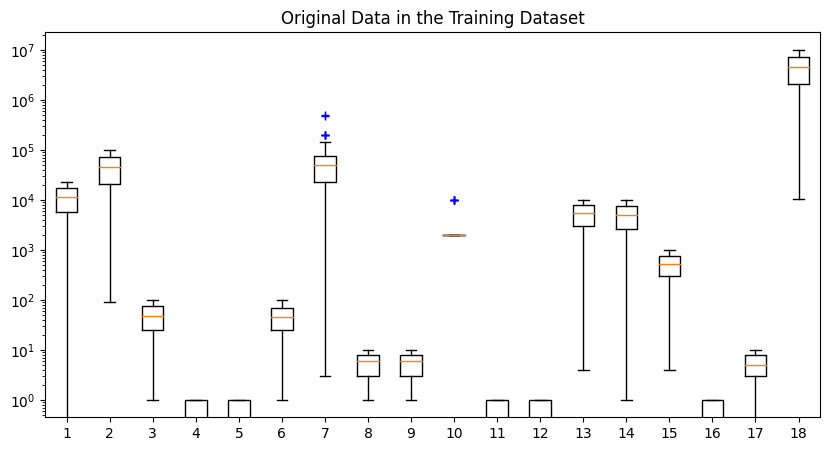

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(10, 5))
plt.title("Original Data in the Training Dataset")
plt.boxplot(train_re, sym='b+')
plt.yscale('log')
plt.show()

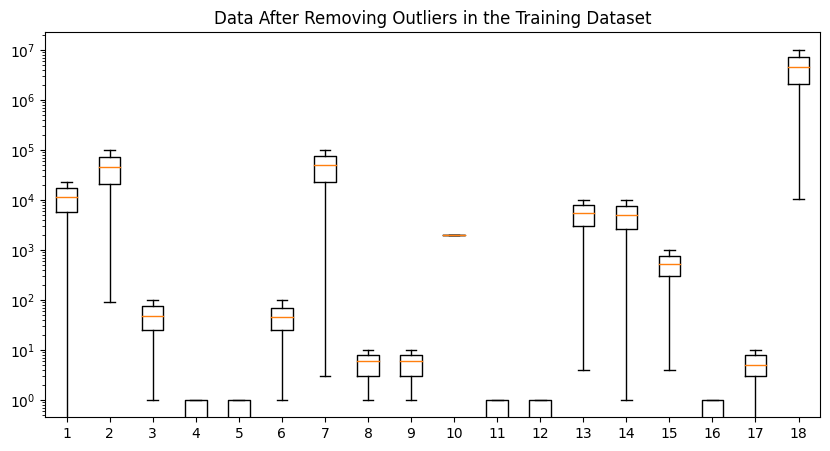

In [ ]:
# z-score
z = np.abs(stats.zscore(train_re)) # 평균은 이상치에 영향을 많이 받음 -> modified zscore 활용
threshold = 3

# 평균에서 표준 편차가 3개 이상인 값을 하나 이상 가지는 데이터 집합의 모든 행을 제거
train_re = train_re[(z < threshold).all(axis=1)] # 불리언으로 반환
plt.figure(figsize=(10, 5))
plt.title("Data After Removing Outliers in the Training Dataset")
plt.boxplot(train_re)
plt.yscale('log')
plt.show()

## feature engineering

### 파생변수

- cityPartRange, 구역 -> 구역별 지도로 파악
    - 에펠탑 근처는 집값이 비쌀 것이다 : 7구역에 에펠탑 1 / 나머지 0
    - 연간 평균소득이 높은 구역은 집값이 비쌀 것이다 : 5,6,7,8,9 구역 높음 1 / 나머지 0

In [ ]:
effel_group = []

for cityPartRange in train_re['cityPartRange']:
  if cityPartRange == 7:
    effel_group.append(1)
  else:
    effel_group.append(0)

train_re['effel'] = effel_group
train_re['effel'].value_counts()

0    20471
1     2231
Name: effel, dtype: int64

In [ ]:
effel_group = []

for cityPartRange in test['cityPartRange']:
  if cityPartRange == 7:
    effel_group.append(1)
  else:
    effel_group.append(0)

test['effel'] = effel_group
test['effel'].value_counts()

0    13597
1     1557
Name: effel, dtype: int64

In [ ]:
high_income_group = []

for cityPartRange in train_re['cityPartRange']:
  if (cityPartRange >=5) & (cityPartRange <=9):
    high_income_group.append(1)
  else:
    high_income_group.append(0)

train_re['high_income'] = high_income_group
train_re['high_income'].value_counts()

1    12786
0     9916
Name: high_income, dtype: int64

In [ ]:
high_income_group = []
for cityPartRange in test['cityPartRange']:
  if (cityPartRange >=5) & (cityPartRange <=9):
    high_income_group.append(1)
  else:
    high_income_group.append(0)

test['high_income'] = high_income_group
test['high_income'].value_counts()

1    8567
0    6587
Name: high_income, dtype: int64

### data type

In [ ]:
train.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
train_re = train_re.astype({"hasYard":"category",
                      "hasPool":"category",
                      "isNewBuilt":"category",
                      "hasStormProtector":"category",
                      "hasStorageRoom":"category",
                      "cityPartRange":"category",
                      "effel":"category",
                      "high_income":"category"})
train_re.dtypes

id                      int64
squareMeters            int64
numberOfRooms           int64
hasYard              category
hasPool              category
floors                  int64
cityCode                int64
cityPartRange        category
numPrevOwners           int64
made                    int64
isNewBuilt           category
hasStormProtector    category
basement                int64
attic                   int64
garage                  int64
hasStorageRoom       category
hasGuestRoom            int64
price                 float64
effel                category
high_income          category
dtype: object

In [ ]:
test = test.astype({"hasYard":"category",
                      "hasPool":"category",
                      "isNewBuilt":"category",
                      "hasStormProtector":"category",
                      "hasStorageRoom":"category",
                      "cityPartRange":"category",
                      "effel":"category",
                      "high_income":"category"})
test.dtypes

id                      int64
squareMeters            int64
numberOfRooms           int64
hasYard              category
hasPool              category
floors                  int64
cityCode                int64
cityPartRange        category
numPrevOwners           int64
made                    int64
isNewBuilt           category
hasStormProtector    category
basement                int64
attic                   int64
garage                  int64
hasStorageRoom       category
hasGuestRoom            int64
effel                category
high_income          category
dtype: object

### feature importance

- 사이킷런 라이브러리를 활용하여 p-value 찾기
    - p-value가 0.05보다 크거나 같은 컬럼은 제외시키기
    - 0.05 미만이면 유의하고 0.05를 초과하면 유의하지 않습니다

In [ ]:
from sklearn.feature_selection import f_regression

X = train_re.drop('price', axis = 1)
y = train_re['price']

f_stats, p_val = f_regression(X,y)

d = pd.DataFrame(p_val.round(2),index=X.columns,columns=['p-val']).sort_values(by='p-val',ascending=False)
d.T

hasStorageRoom  hasYard  hasPool  attic  isNewBuilt   id  \
p-val            0.81      0.7     0.36   0.26        0.23  0.2   

       numPrevOwners  hasGuestRoom  cityPartRange  high_income  effel  \
p-val            0.2          0.17           0.15         0.03   0.01   

       squareMeters  hasStormProtector  basement  cityCode  garage  floors  \
p-val           0.0                0.0       0.0       0.0     0.0     0.0   

       numberOfRooms  made  
p-val            0.0   0.0

In [ ]:
X_drop = X.drop(['hasStorageRoom','hasYard','hasPool', 'attic', 'isNewBuilt', 'id', 'numPrevOwners', 'hasGuestRoom', 'cityPartRange'], axis=1)

In [ ]:
X_drop

squareMeters  numberOfRooms  floors  cityCode  made hasStormProtector  \
0             34291             24      47     35693  2000                 1   
1             95145             60      60     34773  2000                 1   
2             92661             45      62     45457  2020                 1   
3             97184             99      59     15113  2000                 1   
4             61752            100      57     64245  2018                 0   
...             ...            ...     ...       ...   ...               ...   
22713         55825             84      70     12031  2000                 0   
22714         65870             88      49     23197  2015                 1   
22715         93192             42      39      8539  2014                 0   
22716         65797             86      89     23197  2000                 0   
22717         82244             18      38     86728  2018                 0   

       basement  garage effel high_income  
0             8     369     0           0  
1           729     277     0           0  
2          7473     245     0           0  
3          6424     256     0           0  
4          7151     863     0           1  
...         ...     ...   ...         ...  
22713      4477     345     0           0  
22714      4811     755     0           1  
22715      5595     789     0           0  
22716      5358     411     0           0  
22717      6294     572     0           0  

[22702 rows x 10 columns]

### scailing

- 데이터를 모델링하기 전에는 반드시 스케일링 과정을 거쳐야 한다.
- 스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.

    - StandardScaler	기본 스케일. 평균과 표준편차 사용
    - MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
    - MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
    - RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_scaled = rs.fit_transform(X)

X_drop_scaled = X.copy()
X_drop_scaled[X.columns] = rs.transform(X_drop_scaled)
X_drop_scaled = X_drop_scaled[X_drop.columns].to_numpy()

# Modeling & Evaluation

- 데이터들이 독립적이고 동일한 분포를 가진 경우 : KFold, RepeatedKFold, LeaveOneOut(LOO), LeavePOutLeaveOneOut(LPO)

- 데이터의 분포가 다른 경우 : StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit

- 회귀에서는 연속적인 값들로 구성되어 비율을 측정할 수 없어서 StratifiedKFold를 사용할 수 없으므로 KFold 사용
- 분류에서는 불균형한 타겟값이니까 StratifiedKFold 사용



### 타겟 확인

<ipython-input-46-0e491a3fbcff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y);


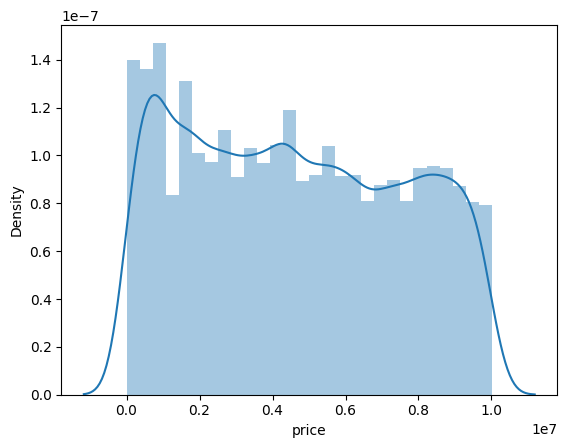

In [ ]:
# 타겟 그래프
sns.distplot(y);

<ipython-input-47-e1bcdd088813>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_trans);


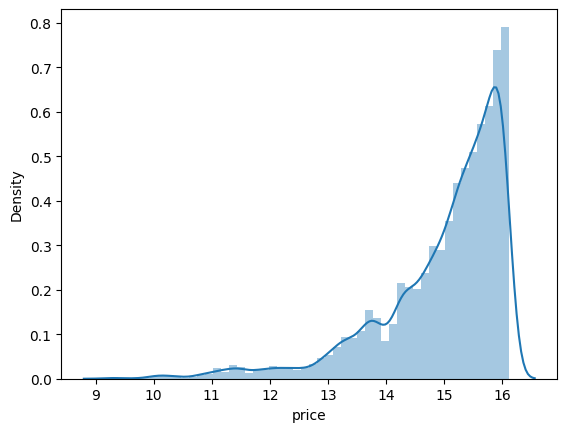

In [ ]:
# 타겟은 정상적으로 분포되어 있지 않은 것 같은데, 로그 변환을 적용하는 것이 좋지 않을까
y_trans = np.log(y)
sns.distplot(y_trans);

## LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold

def model_scorer(model,X=X_drop.to_numpy(),y=y.to_numpy(),splits=5,trans=False):
    kf = KFold(splits,shuffle=True,random_state=42)
    scores = []

    for f ,(train,test) in enumerate(kf.split(X)):
        X_train, y_train = X[train], y[train]
        X_test, y_test = X[test], y[test]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if not trans: score = np.sqrt(mse(y_test,y_pred))
        else: score = np.sqrt(mse(np.exp(y_test),np.exp(y_pred)))

        print(f'FOLD --- {f+1} ============= RMSE : {score}')
        scores.append(score)

    print(f'RMSE ALL FOLDS : {np.mean(scores)}')

In [ ]:
from sklearn.linear_model import LinearRegression

lr_params = {'fit_intercept': False,
 'n_jobs': -1
}

lr = LinearRegression(**lr_params)

print('LinearRegression Performance on Raw Target')
model_scorer(lr,X=X_drop_scaled)

print('\nLinearRegression Performance on Transformed Target')
model_scorer(lr,X=X_drop_scaled,y=y_trans.to_numpy(),trans=True)

LinearRegression Performance on Raw Target
FOLD --- 1 ============= RMSE : 2582950.2984121325
FOLD --- 2 ============= RMSE : 2549723.402204706
FOLD --- 3 ============= RMSE : 2600321.8262213003
FOLD --- 4 ============= RMSE : 2578079.156816354
FOLD --- 5 ============= RMSE : 2598313.1722819493
RMSE ALL FOLDS : 2581877.5711872885

LinearRegression Performance on Transformed Target
FOLD --- 1 ============= RMSE : 620635644.4615273
FOLD --- 2 ============= RMSE : 604055708.8379219
FOLD --- 3 ============= RMSE : 829304949.6853349
FOLD --- 4 ============= RMSE : 720516992.8576481
FOLD --- 5 ============= RMSE : 635266002.4940326
RMSE ALL FOLDS : 681955859.667293


### submission

- 성능 좋지 않음, 모델 변경

## LightBGMRegressor

In [ ]:
from lightgbm import LGBMRegressor

# lgbc_params = {'learning_rate': 0.01, # 훈련량, 학습 시 모델을 얼마나 업데이트할지 결정하는 값, 성능 높일 때 더 줄임
#                'random_state': 42,
#                'max_depth': -1, # 제한없이 분기
#                'feature_fraction': 0.9, # 90%만 랜덤하게 추출, 과적합 방지
#                'n_jobs': -1 # 병렬처리에 사용할 CPU 수
# }

lgbc = LGBMRegressor()

print('LGBMRegressor Performance on Raw Target')
model_scorer(lgbc,X=X_drop_scaled)

print('\nLGBMRegressor Performance on Transformed Target')
model_scorer(lgbc,X=X_drop_scaled,y=y_trans.to_numpy(),trans=True)

LGBMRegressor Performance on Raw Target
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the train set: 18161, number of used features: 10
[LightGBM] [Info] Start training from score 4616964.061254
FOLD --- 1 ============= RMSE : 65395.39176963979
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the train set: 18161, number of used features: 10
[LightGBM] [Info] Start training from score 4633855.764471
FOLD --- 2 ============= RMSE : 110196.10634749821
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002998 seco

### submission

In [ ]:
lgbc.fit(X_drop_scaled,y)

test_df = test.copy()
test_df[X.columns] = rs.transform(test_df[X.columns])
test_scaled = test_df[X_drop.columns]

pred = lgbc.predict(test_scaled)

submission['price'] = pred
submission.to_csv(os.path.join(path, 'submission_lgbc_1.csv'), index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the train set: 22702, number of used features: 10
[LightGBM] [Info] Start training from score 4634087.253141


## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# rf_params = {
#         'n_estimators': 126,
#         'max_depth': 14 , # 트리의 최대 깊이
#         'min_samples_split':,  # 노드를 분할하기 위한 최소한의 샘플 데이터 수
#         'min_samples_leaf':  # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
#         'max_features':  # 최적의 분할을 위해 고려할 최대 Feature 개수
#         'max_leaf_nodes':  # 리프 노드의 최대 개수
#         'n_jobs': -1,
#         'verbose':
#         'max_samples':
#     }

rf = RandomForestRegressor()

print('RandomForestRegressor Performance on Raw Target')
model_scorer(rf,X=X_drop_scaled)

print('\nRandomForestRegressor Performance on Transformed Target')
model_scorer(rf,X=X_drop_scaled,y=y_trans.to_numpy(),trans=True)

RandomForestRegressor Performance on Raw Target
FOLD --- 1 ============= RMSE : 115645.56740671037
FOLD --- 2 ============= RMSE : 76687.11861999877
FOLD --- 3 ============= RMSE : 211406.31284434194
FOLD --- 4 ============= RMSE : 230410.88488895274
FOLD --- 5 ============= RMSE : 117184.67337384785
RMSE ALL FOLDS : 150266.91142677033

RandomForestRegressor Performance on Transformed Target
FOLD --- 1 ============= RMSE : 134599.85756795865
FOLD --- 2 ============= RMSE : 128289.57826689309
FOLD --- 3 ============= RMSE : 215358.35735275617
FOLD --- 4 ============= RMSE : 241583.98514914155
FOLD --- 5 ============= RMSE : 104891.99071079933
RMSE ALL FOLDS : 164944.75380950974


### submission

In [ ]:
rf.fit(X_drop_scaled,y)

test_df = test.copy()
test_df[X.columns] = rs.transform(test_df[X.columns])
test_scaled = test_df[X_drop.columns]

pred = rf.predict(test_scaled)

submission['price'] = pred
submission.to_csv(os.path.join(path, 'submission_xgb_1.csv'), index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## XGBoostRegressor

In [ ]:
from xgboost import XGBRegressor

# xg_params = {'objective': 'reg:squarederror',
#  'base_score': 0.5,
#  'booster': 'gbtree',
#  'colsample_bylevel': 1,
#  'colsample_bynode': 1,
#  'colsample_bytree': 1,
#  'gamma': 0,
#  'gpu_id': -1,
#  'grow_policy': 'depthwise',
#  'importance_type': None,
#  'interaction_constraints': '',
#  'learning_rate': 0.300000012,
#  'max_bin': 256,
#  'max_cat_to_onehot': 4,
#  'max_delta_step': 0,
#  'max_depth': 6,
#  'max_leaves': 0,
#  'min_child_weight': 1,
#  'monotone_constraints': '()',
#  'n_estimators': 100,
#  'n_jobs': -1,
#  'num_parallel_tree': 1,
#  'predictor': 'auto',
#  'random_state': 42,
#  'reg_alpha': 0,
#  'reg_lambda': 1,
#  'sampling_method': 'uniform',
#  'scale_pos_weight': 1,
#  'subsample': 1,
#  'tree_method': 'auto',
#  'validate_parameters': 1,
#  'verbosity': 0
# }

# xg = XGBRegressor(**xg_params)

xg = XGBRegressor()

print('XGBoost Performance on Raw Target')
model_scorer(xg,X=X_drop_scaled)

print('\nXGBoost Performance on Transformed Target')
model_scorer(xg,X=X_drop_scaled,y=y_trans.to_numpy(),trans=True)

XGBoost Performance on Raw Target
FOLD --- 1 ============= RMSE : 125774.58198732055
FOLD --- 2 ============= RMSE : 120261.23412419246
FOLD --- 3 ============= RMSE : 234755.55433664878
FOLD --- 4 ============= RMSE : 248670.69997446335
FOLD --- 5 ============= RMSE : 104781.12776301272
RMSE ALL FOLDS : 166848.63963712758

XGBoost Performance on Transformed Target
FOLD --- 1 ============= RMSE : 232022.004738996
FOLD --- 2 ============= RMSE : 181626.0714847117
FOLD --- 3 ============= RMSE : 238439.41200238996
FOLD --- 4 ============= RMSE : 275017.08294386906
FOLD --- 5 ============= RMSE : 155965.8622971289
RMSE ALL FOLDS : 216614.08669341914


### submission

In [ ]:
xg.fit(X_drop_scaled,y)

test_df = test.copy()
test_df[X.columns] = rs.transform(test_df[X.columns])
test_scaled = test_df[X_drop.columns]

pred = xg.predict(test_scaled)

submission['price'] = pred
submission.to_csv(os.path.join(path, 'submission_xgb_2.csv'), index=False)

# 최적화

## 앙상블 모델 + cv + 그리드서치 + 하이퍼파라미터

## 풀데이터 사용 - 검정 데이터도 학습에 모두 사용

- X데이터, log_y를 풀 데이터로 사용
    - AutoML에서 생성
- 훈련 => submission 생성 => 제출
- 기존 데이터의 25%를 더 추가학습 => 상승 기대

## AutoML - 파이캐럿